Импортируем библиотеки

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

import numpy as np

from datetime import datetime

import cv2

Загрузим набор данных и создадим объект для итерации данных

http://yann.lecun.com/exdb/mnist/ - набор данных

Объект для добавления шума

In [ ]:
from skimage.util import random_noise

class AddSaltAndPaperNoise(object):
    def __call__(self, tensor):
        return torch.tensor(random_noise(tensor, mode='salt', amount=0.05))

Пдготовим данные

In [ ]:
# приведение изображения к тензору
transform = transforms.Compose(
    [transforms.ToTensor()])

# приведение изображения к тензору и добавление шума
transform_noise = transforms.Compose(
    [transforms.ToTensor(),
     AddSaltAndPaperNoise()])

batch_size = 64 # кол-во картинок для обучения за раз

# объект набора данных для обучения
trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
# объект набора данных для обучения с шумом
trainset_noise = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform_noise)

# объект для итераций по наборам данных
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=False, num_workers=2)
trainloader_noise = torch.utils.data.DataLoader(trainset_noise, batch_size=batch_size,
                                          shuffle=False, num_workers=2)

# аналогичные объекты для тестирования
testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)
testset_noise = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform_noise)

testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)
testloader_noise = torch.utils.data.DataLoader(testset_noise, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

# классы классификации
classes = ('цифра 0', 'цифра 1', 'цифра 2', 'цифра 3', 'цифра 4',
           'цифра 5', 'цифра 6', 'цифра 7', 'цифра 8', 'цифра 9')

100%|██████████| 9912422/9912422 [00:00<00:00, 94013348.75it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 114171247.71it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 22685690.00it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 17334421.08it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Пиксели изображения находятся в диапозоне от 0 (черный) до 1 (белый), т.е. данные уже нормализованы. Для визуализации ожидаются данные, лежащие в диапозоне от 0 до 1 для данных типа float32 (наш случай) или от 0 до 255 для данных типа int.

In [ ]:
dataiter = iter(trainloader) # объект итератора
images, labels = next(dataiter) # получение значения

for image, label in zip(images, labels):
  print(type(image.numpy()[0][0][0]))
  print(image.numpy()[0][0][0])
  print(label)
  break

<class 'numpy.float32'>
0.0
tensor(5)


Демонстрация загруженных данных

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def show_grid_images(img):
    plt.imshow(np.transpose(img.numpy(), (1, 2, 0)))
    plt.show()

def show_single_images(img, need_print = False):
    if img.get_device() != 'cpu':
      img = img.to('cpu')
    npimg = img.numpy()
    if need_print:
      print(f'размер до транспонирования {npimg.shape}')
    npimg_transpose = np.transpose(npimg, (1, 2, 0)) # при (2, 1, 0) изображение будет поверуто на 90 градусов влево
    if need_print:
      print(f'размер после транспонирования {npimg.shape}')
    plt.imshow(npimg_transpose, cmap='gray')
    plt.show()

размер до транспонирования (1, 28, 28)
размер после транспонирования (1, 28, 28)


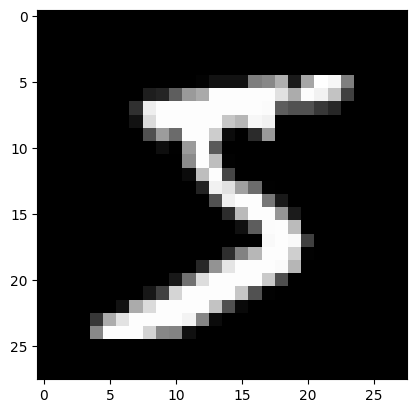

значение метки 5, имя класса по индексу значения метки "цифра 5"
размер до транспонирования (1, 28, 28)
размер после транспонирования (1, 28, 28)


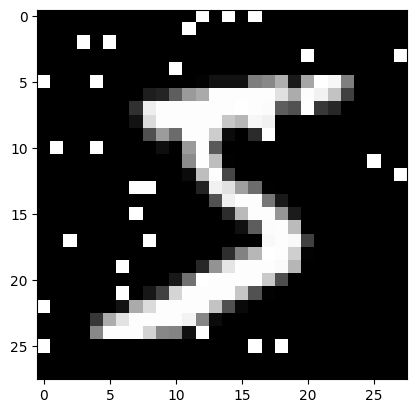

значение метки 5, имя класса по индексу значения метки "цифра 5"


In [ ]:
show_single_images(trainset[0][0], True)
print(f'значение метки {trainset[0][1]}, имя класса по индексу значения метки "{classes[trainset[0][1]]}"')

show_single_images(trainset_noise[0][0], True)
print(f'значение метки {label}, имя класса по индексу значения метки "{classes[label.item()]}"')

images_grid size torch.Size([3, 242, 242])


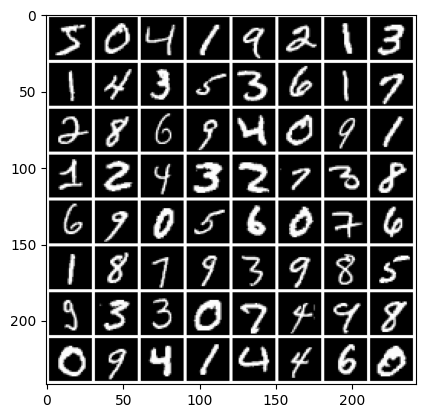

цифра 5, цифра 0, цифра 4, цифра 1, цифра 9, цифра 2, цифра 1, цифра 3, цифра 1, цифра 4, цифра 3, цифра 5, цифра 3, цифра 6, цифра 1, цифра 7, цифра 2, цифра 8, цифра 6, цифра 9, цифра 4, цифра 0, цифра 9, цифра 1, цифра 1, цифра 2, цифра 4, цифра 3, цифра 2, цифра 7, цифра 3, цифра 8, цифра 6, цифра 9, цифра 0, цифра 5, цифра 6, цифра 0, цифра 7, цифра 6, цифра 1, цифра 8, цифра 7, цифра 9, цифра 3, цифра 9, цифра 8, цифра 5, цифра 9, цифра 3, цифра 3, цифра 0, цифра 7, цифра 4, цифра 9, цифра 8, цифра 0, цифра 9, цифра 4, цифра 1, цифра 4, цифра 4, цифра 6, цифра 0

images_noise_grid size torch.Size([3, 242, 242])


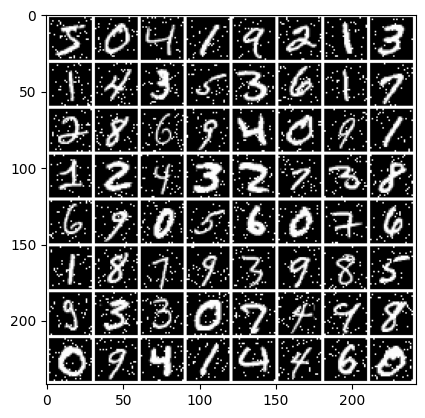

цифра 5, цифра 0, цифра 4, цифра 1, цифра 9, цифра 2, цифра 1, цифра 3, цифра 1, цифра 4, цифра 3, цифра 5, цифра 3, цифра 6, цифра 1, цифра 7, цифра 2, цифра 8, цифра 6, цифра 9, цифра 4, цифра 0, цифра 9, цифра 1, цифра 1, цифра 2, цифра 4, цифра 3, цифра 2, цифра 7, цифра 3, цифра 8, цифра 6, цифра 9, цифра 0, цифра 5, цифра 6, цифра 0, цифра 7, цифра 6, цифра 1, цифра 8, цифра 7, цифра 9, цифра 3, цифра 9, цифра 8, цифра 5, цифра 9, цифра 3, цифра 3, цифра 0, цифра 7, цифра 4, цифра 9, цифра 8, цифра 0, цифра 9, цифра 4, цифра 1, цифра 4, цифра 4, цифра 6, цифра 0


In [ ]:
dataiter = iter(trainloader) # объект итератора
images, labels = next(dataiter) # получение значения

dataiter_noise = iter(trainloader_noise) # объект итератора
images_noise, labels_noise = next(dataiter_noise) # получение значения

# показать изображения в сетке
images_grid = torchvision.utils.make_grid(images, pad_value = 1) # pad_value = 1 означает белые рамки между картинками
print(f'images_grid size {images_grid.size()}')
show_grid_images(images_grid)
# вывод классов картинок
print(', '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

print()

# показать изображения в сетке
images_noise_grid = torchvision.utils.make_grid(images_noise, pad_value = 1) # pad_value = 1 означает белые рамки между картинками
print(f'images_noise_grid size {images_noise_grid.size()}')
show_grid_images(images_noise_grid)
# вывод классов картинок
print(', '.join(f'{classes[labels_noise[j]]:5s}' for j in range(batch_size)))


Определим устройство

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


Определим архитектуру нейронной сети автокодировщика

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class AutoencoderLinear(torch.nn.Module):
    def __init__(self):
        super().__init__()

        self.encoder = torch.nn.Sequential(
            torch.nn.Linear(28 * 28, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 36),
            torch.nn.ReLU(),
            torch.nn.Linear(36, 18),
            torch.nn.ReLU(),
            torch.nn.Linear(18, 9)
        )

        self.decoder = torch.nn.Sequential(
            torch.nn.Linear(9, 18),
            torch.nn.ReLU(),
            torch.nn.Linear(18, 36),
            torch.nn.ReLU(),
            torch.nn.Linear(36, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 28 * 28),
            torch.nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

al = AutoencoderLinear()
al = al.to(device)

class EncoderConv(torch.nn.Module):
    def __init__(self):
        super().__init__()

        self.conv1 = torch.nn.Conv2d(1, 32, 3)
        self.conv2 = torch.nn.Conv2d(32, 64, 3)
        self.conv3 = torch.nn.Conv2d(64, 128, 3)
        self.conv4 = torch.nn.Conv2d(128, 256, 3)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.conv3(x)
        x = F.relu(x)
        x = self.conv4(x)
        return x

class DecoderConv(torch.nn.Module):
    def __init__(self):
        super().__init__()

        self.t_conv1 = torch.nn.ConvTranspose2d(256, 128, 3)
        self.t_conv2 = torch.nn.ConvTranspose2d(128, 64, 3)
        self.t_conv3 = torch.nn.ConvTranspose2d(64, 32, 3)
        self.t_conv4 = torch.nn.ConvTranspose2d(32, 1, 3)

    def forward(self, x):
        x = self.t_conv1(x)
        x = F.relu(x)
        x = self.t_conv2(x)
        x = F.relu(x)
        x = self.t_conv3(x)
        x = F.relu(x)
        x = self.t_conv4(x)
        x = F.sigmoid(x)
        return x

class AutoencoderConv(torch.nn.Module):
    def __init__(self):
        super().__init__()

        self.encoder = EncoderConv()
        self.decoder = DecoderConv()

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

ac = AutoencoderConv()
ac = ac.to(device)

Определим функцию ошибки и оптимизатор

In [ ]:
mse = torch.nn.MSELoss()
bce = nn.BCELoss()

optimizer_al = torch.optim.SGD(al.parameters(), lr = 0.1)
optimizer_ac = torch.optim.SGD(ac.parameters(), lr = 0.1)

функция обучения автокодировщика с полносвязными слоями

In [ ]:
def train_linear(loader, loader_noise, loss, optimizer, model):
  epochs = 2
  print_every = 100
  iter = 0
  losses = []
  for epoch in range(epochs):
      for images, images_noise in zip(loader, loader_noise):
        for image, image_noise in zip (images[0], images_noise[0]):
          # переносим изображения на устройство
          image = image.to(device)
          image_noise = image_noise.to(device)
          # уплощаем картинки в одномерный список из 784 элементов
          image_flat = image.flatten()
          image_noise_flat = image_noise.flatten()

          optimizer.zero_grad() # сбросываем оптимизатор
          output = model(image_noise_flat) # получаем вывод модели
          loss_res = loss(output, image_flat) # вычисляем функцию ошибки
          loss_res.backward() # вычисляем обратный градиент
          optimizer.step() # корректируем веса модели

          losses.append(loss_res)

        iter += 1
        if iter % print_every == 0:
          print(f'epoch {epoch+1} iteration {iter} avg loss {sum(losses)/len(losses)}')
          losses.clear()

      iter = 0
      # сохраняем модель в процессе обучения
      name = f'./al_{epoch + 1}.pth'
      torch.save(model.state_dict(), name)

In [ ]:
train_linear(trainloader, trainloader_noise, mse, optimizer_al, al)

epoch 1 iteration 100 avg loss 0.12076821178197861
epoch 1 iteration 200 avg loss 0.06697256118059158
epoch 1 iteration 300 avg loss 0.06451249122619629
epoch 1 iteration 400 avg loss 0.06504924595355988
epoch 1 iteration 500 avg loss 0.06213006004691124
epoch 1 iteration 600 avg loss 0.06296969205141068
epoch 1 iteration 700 avg loss 0.06161400303244591
epoch 1 iteration 800 avg loss 0.06109919399023056
epoch 1 iteration 900 avg loss 0.060167279094457626
epoch 2 iteration 100 avg loss 0.06025818735361099
epoch 2 iteration 200 avg loss 0.05970928445458412
epoch 2 iteration 300 avg loss 0.059591520577669144
epoch 2 iteration 400 avg loss 0.06030309572815895
epoch 2 iteration 500 avg loss 0.05758971720933914
epoch 2 iteration 600 avg loss 0.058728985488414764
epoch 2 iteration 700 avg loss 0.05738607421517372
epoch 2 iteration 800 avg loss 0.056683629751205444
epoch 2 iteration 900 avg loss 0.055506061762571335


Загрузим обученнные веса линейного автокодировщика

In [ ]:
al_loaded = AutoencoderLinear()
al_loaded.load_state_dict(torch.load('al_2.pth'))
al_loaded = al_loaded.to(device)

функция для удаления шумов и вывода картинок

In [ ]:
def process_image_linear(image, model):
  show_single_images(image)
  image = image.to(device)
  #print(image.get_device())
  output = model(image.flatten())
  #print(output.size())
  output_image = output.reshape(-1, 28, 28)
  show_single_images(output_image)

Проверим обученнный линейный автокодировщик

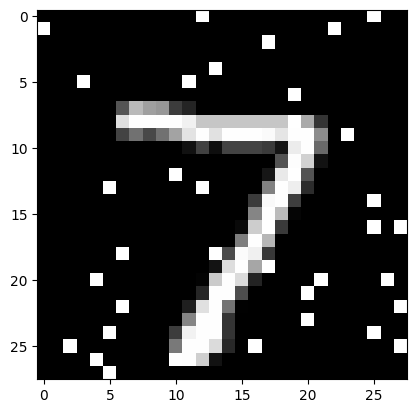

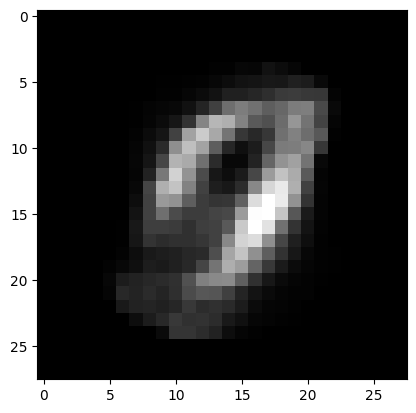

------------------------


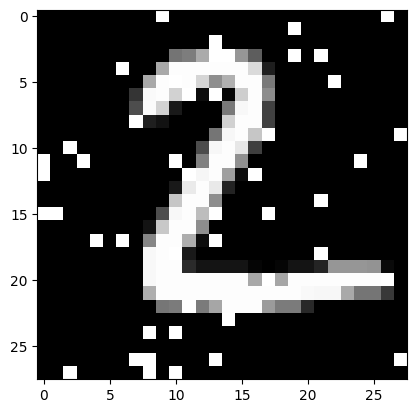

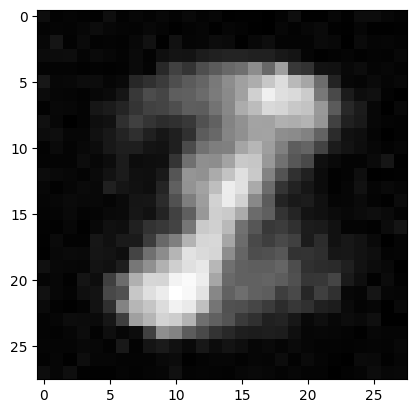

------------------------


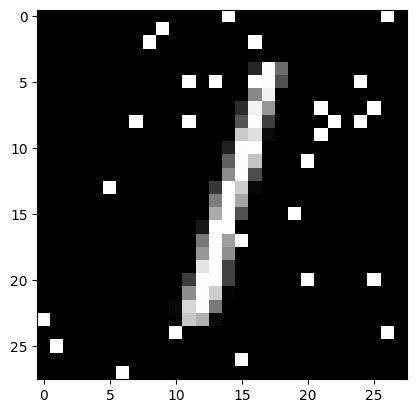

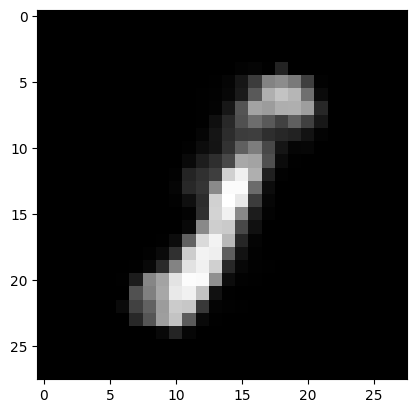

------------------------


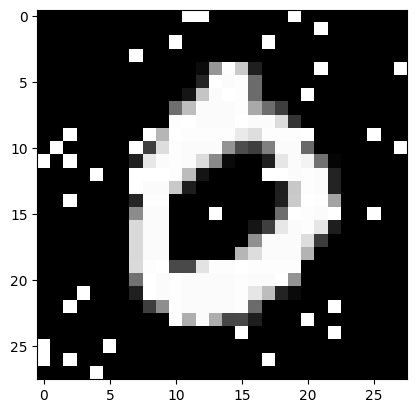

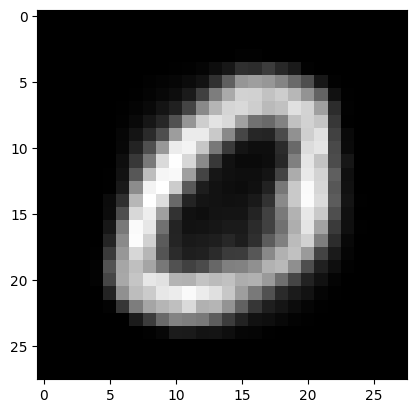

------------------------


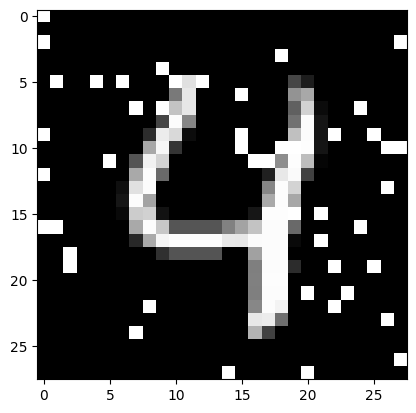

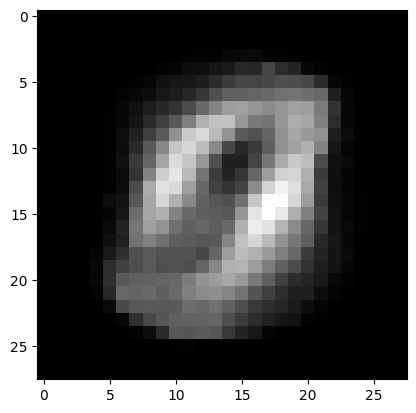

------------------------


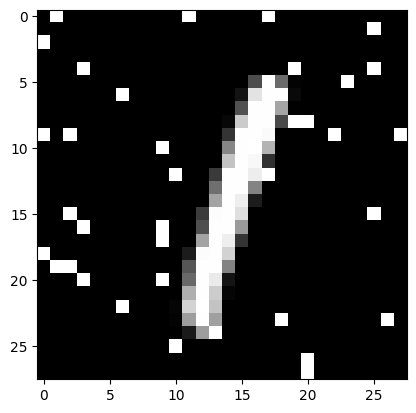

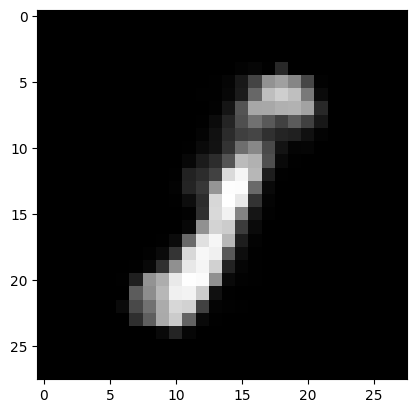

------------------------


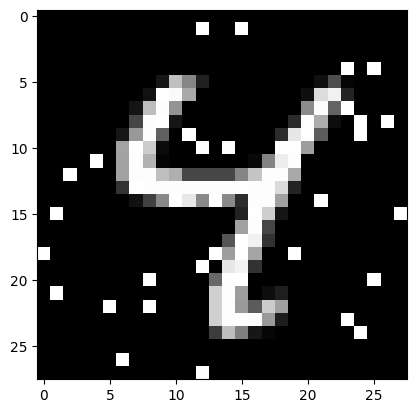

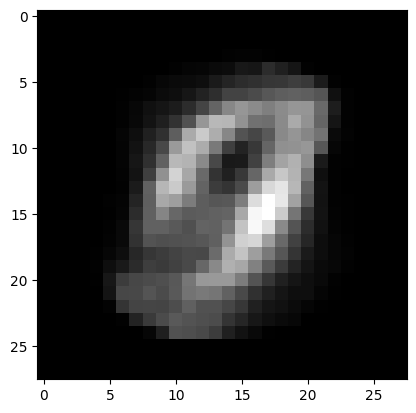

------------------------


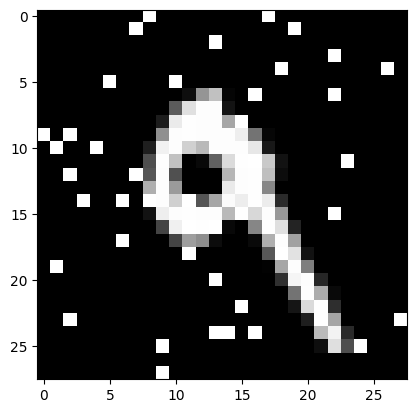

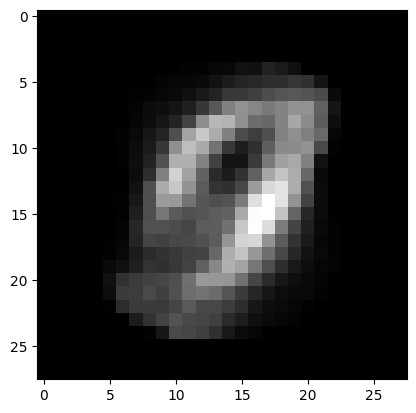

------------------------


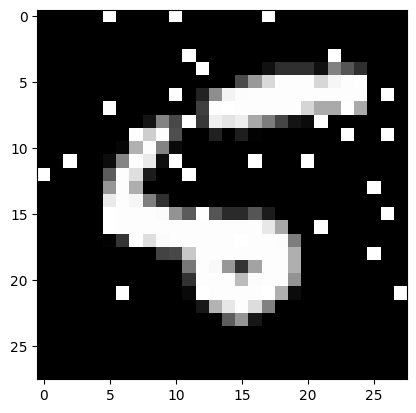

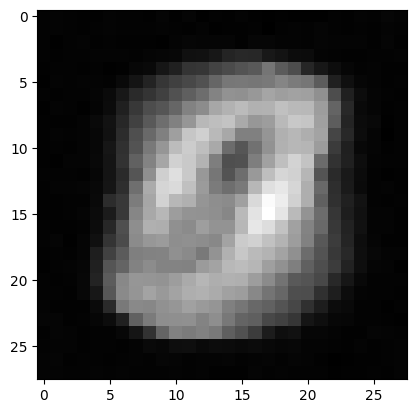

------------------------


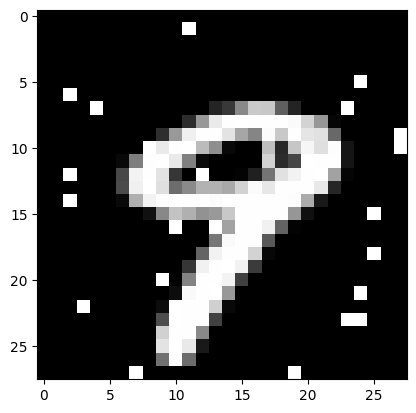

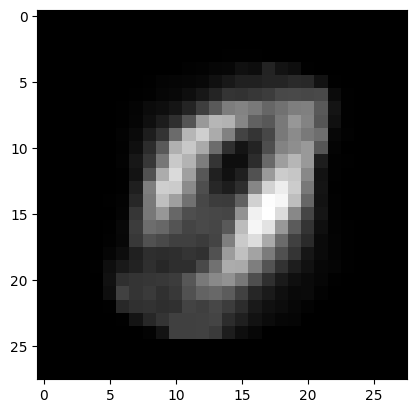

------------------------


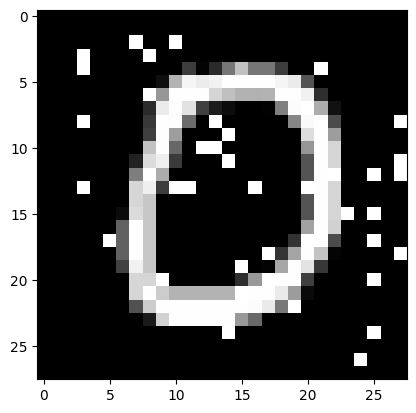

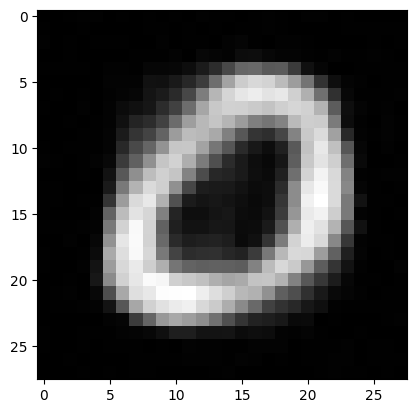

------------------------


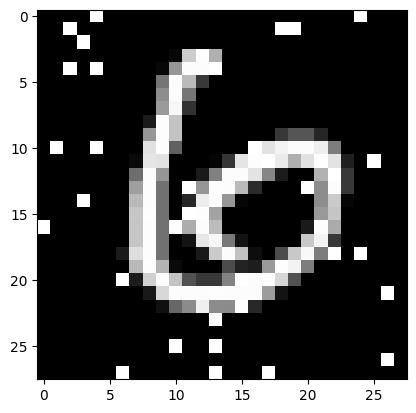

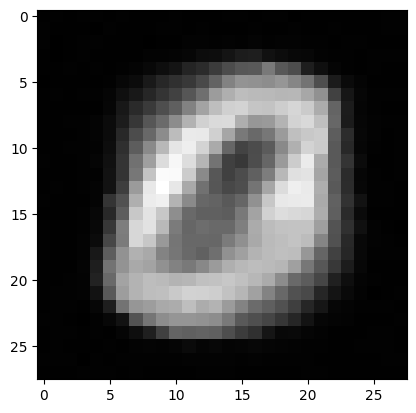

------------------------


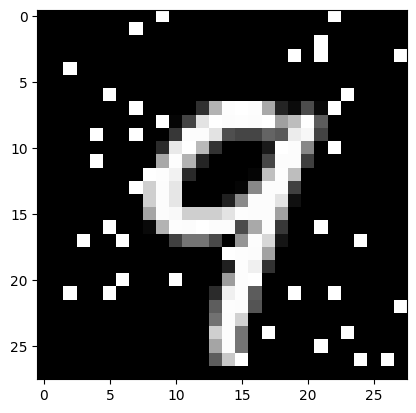

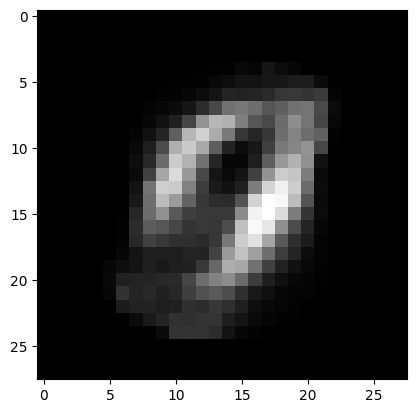

------------------------


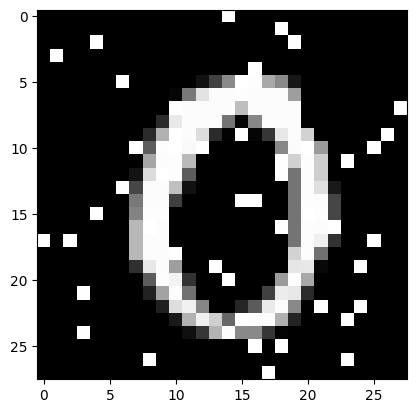

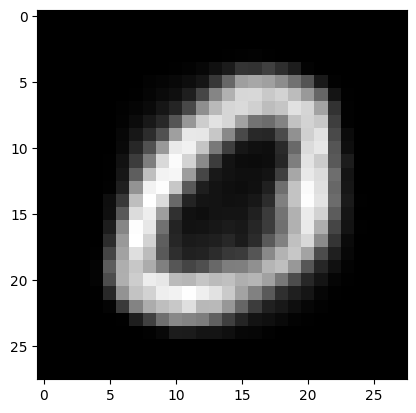

------------------------


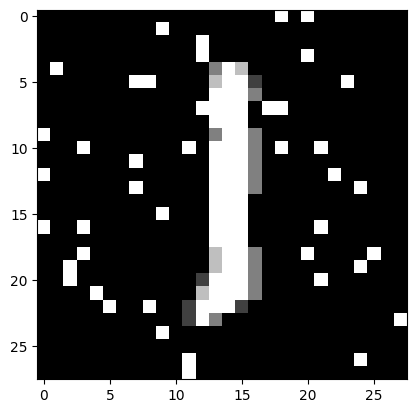

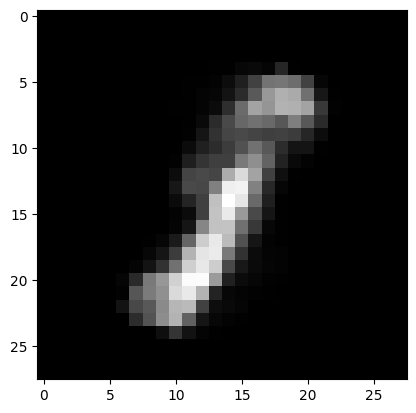

------------------------


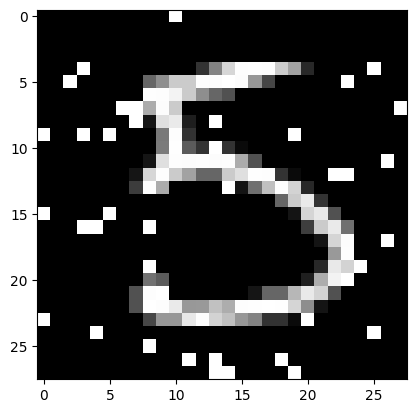

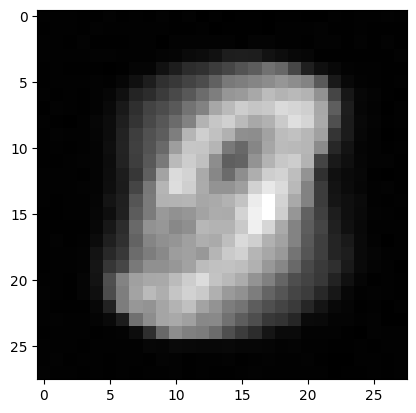

------------------------


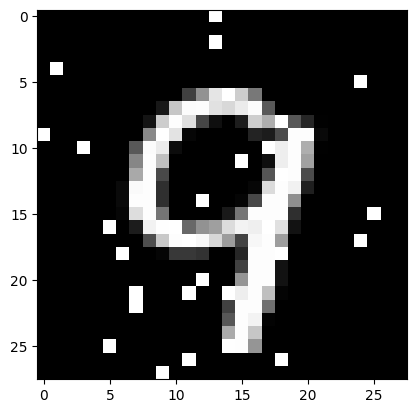

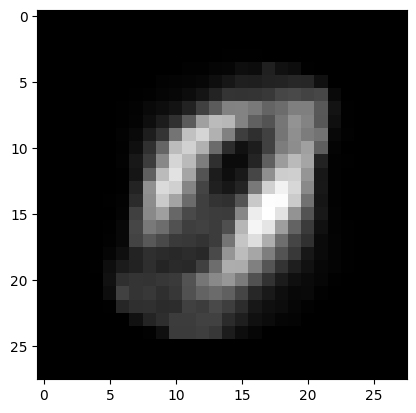

------------------------


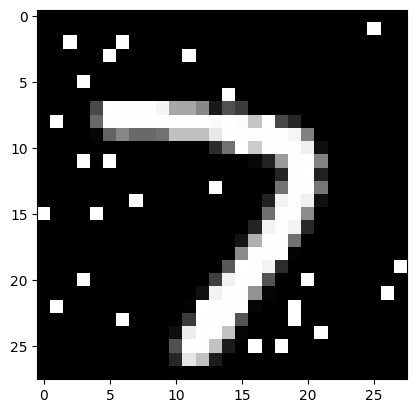

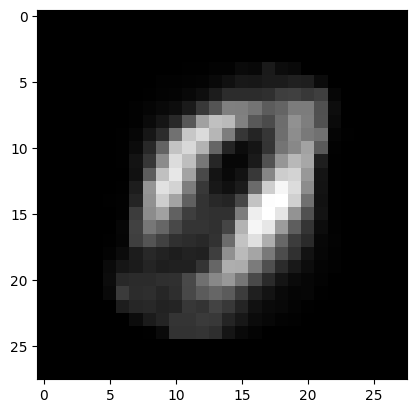

------------------------


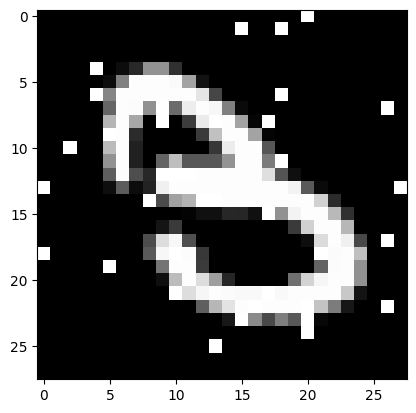

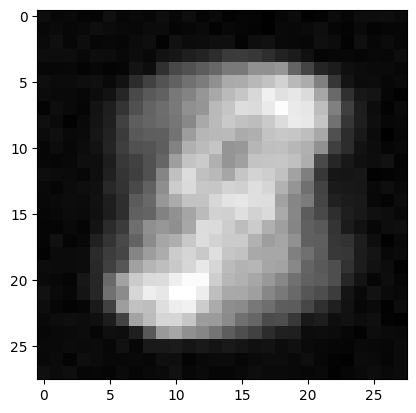

------------------------


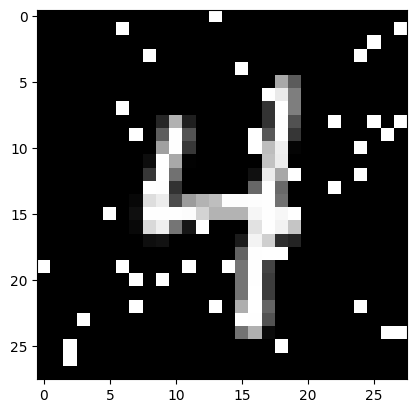

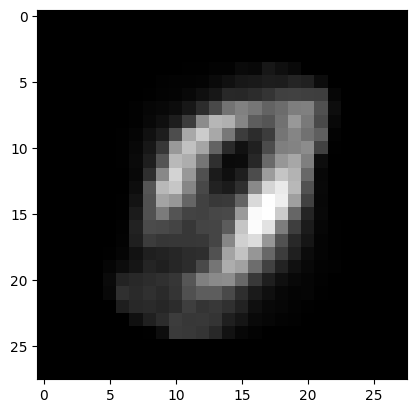

------------------------


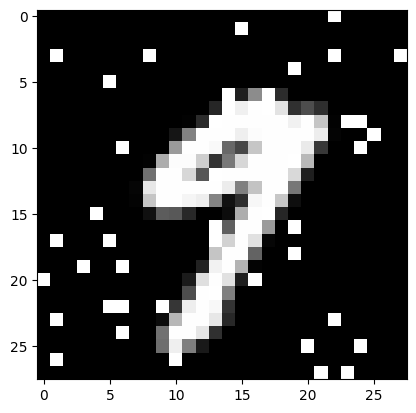

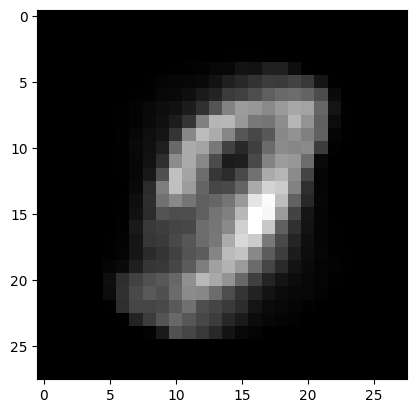

------------------------


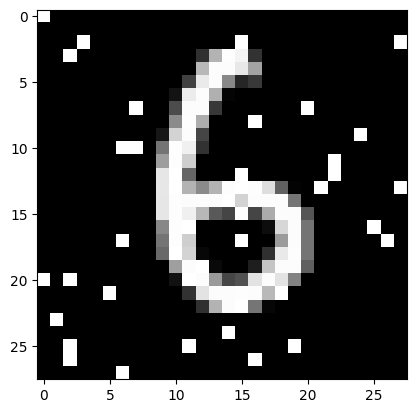

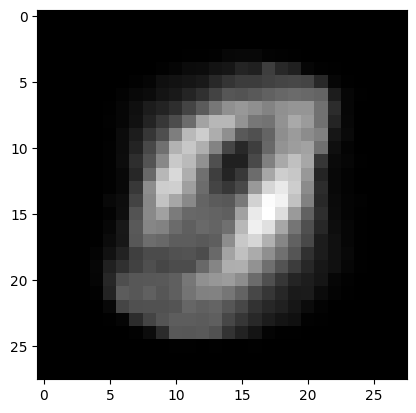

------------------------


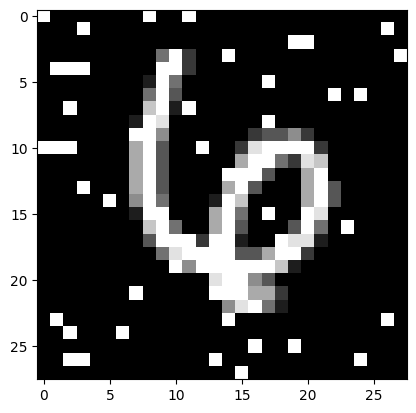

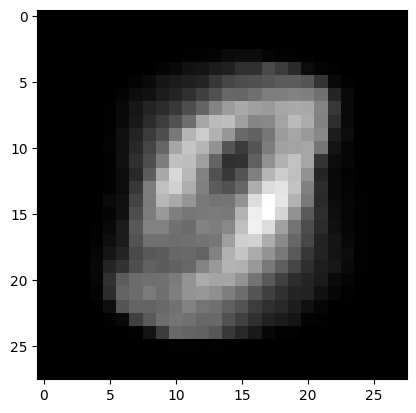

------------------------


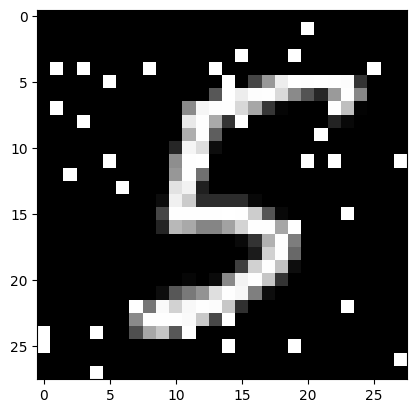

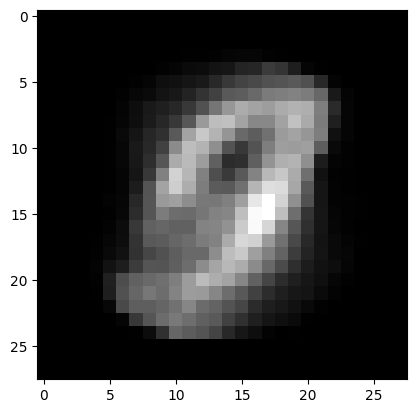

------------------------


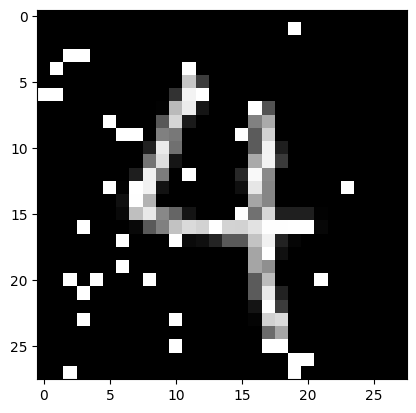

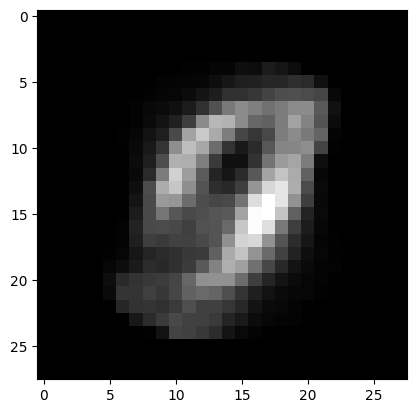

------------------------


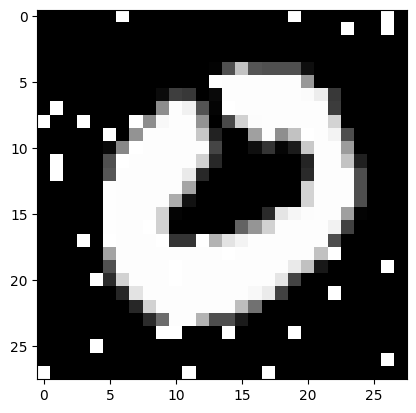

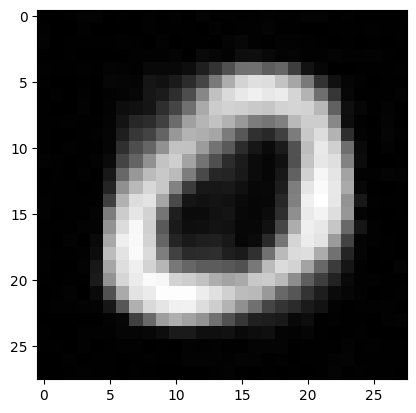

------------------------


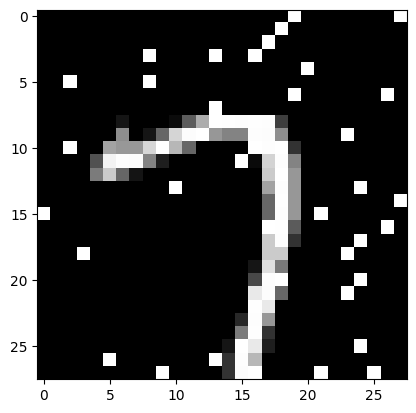

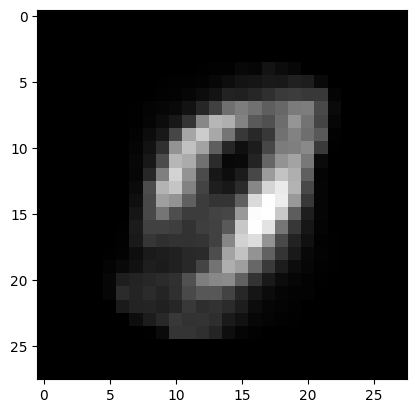

------------------------


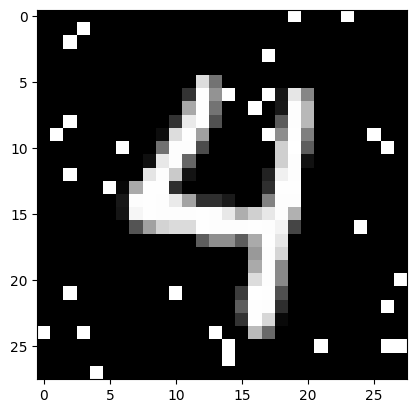

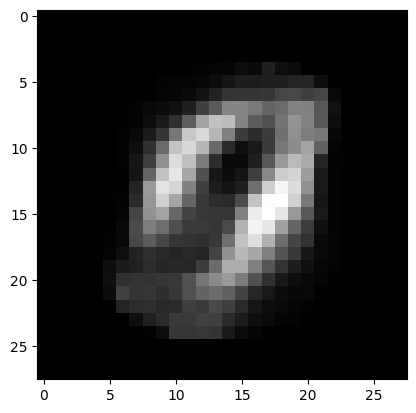

------------------------


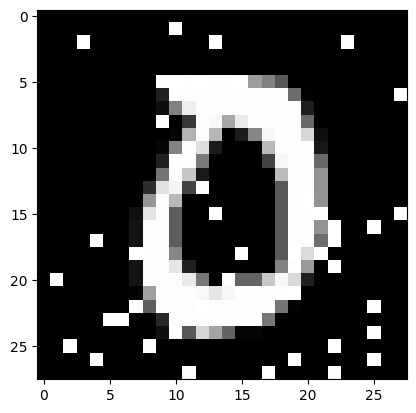

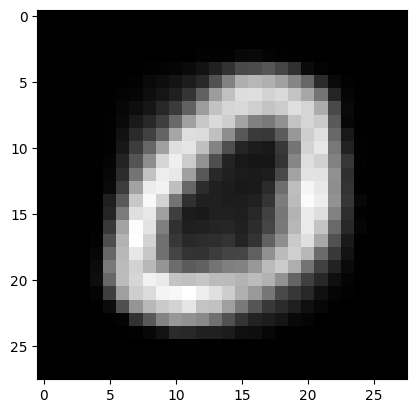

------------------------


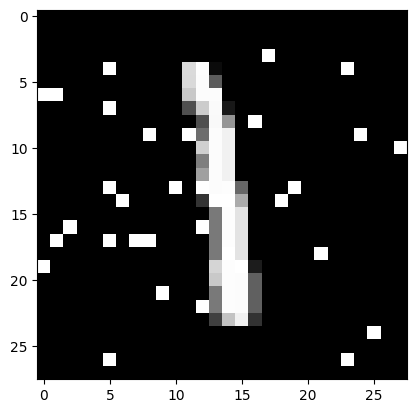

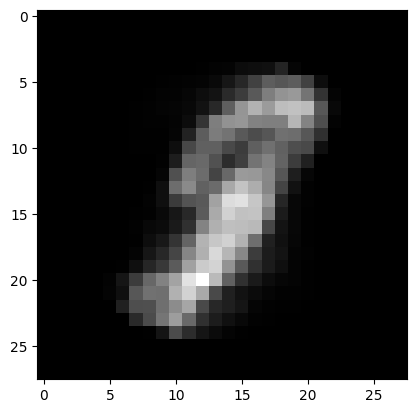

------------------------


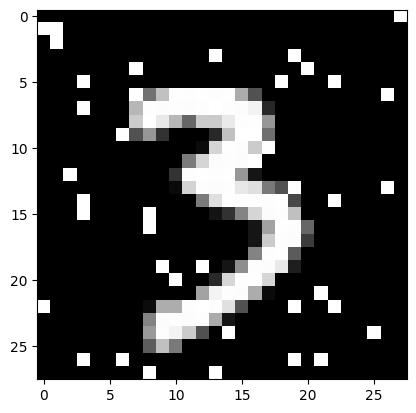

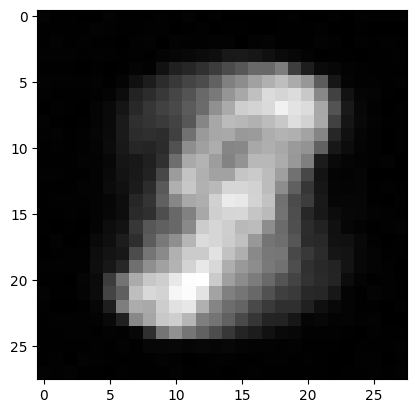

------------------------


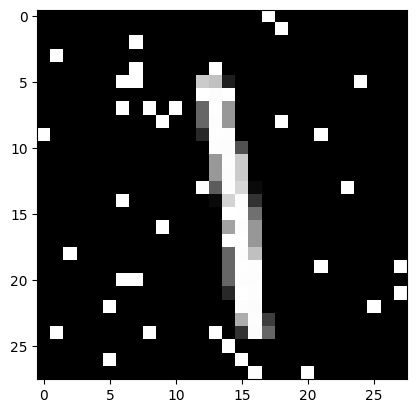

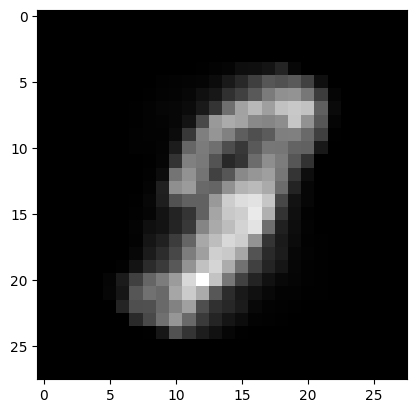

------------------------


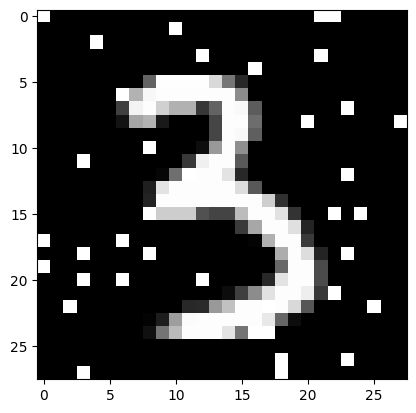

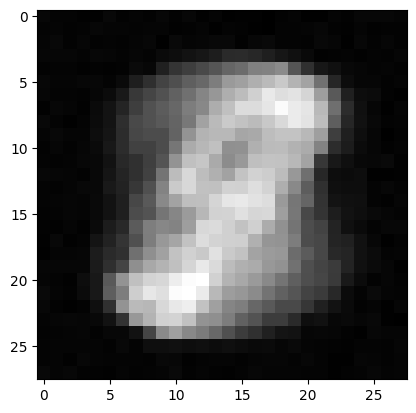

------------------------


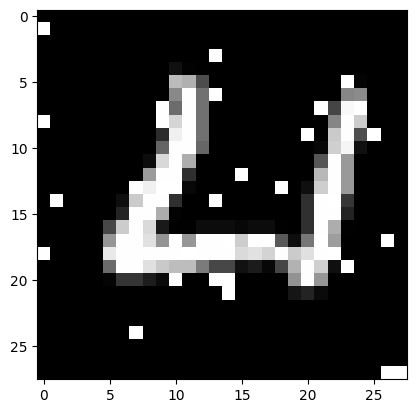

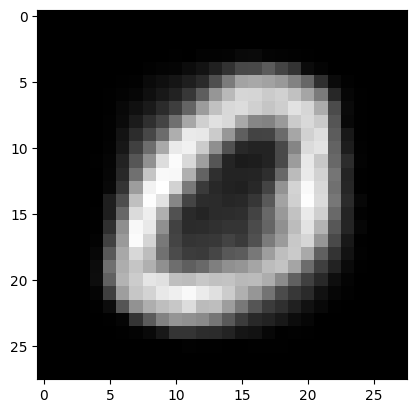

------------------------


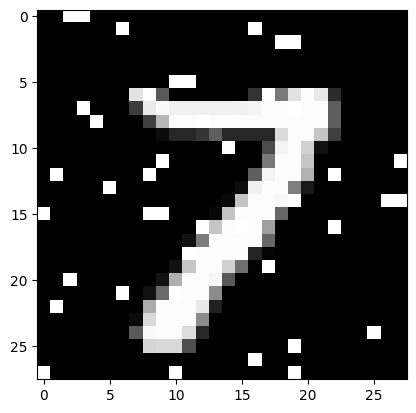

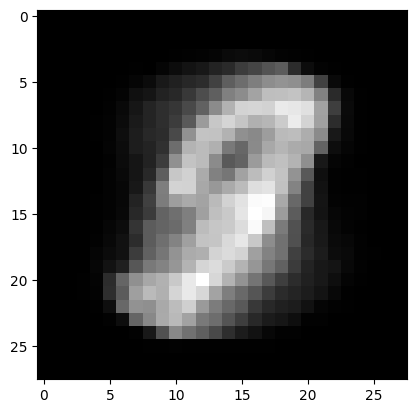

------------------------


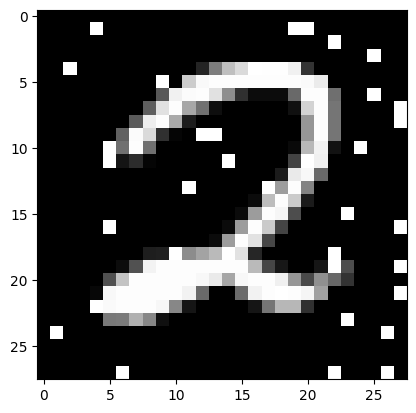

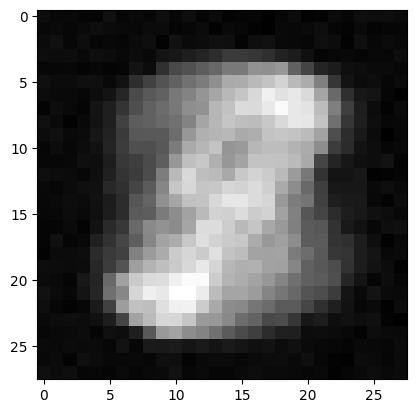

------------------------


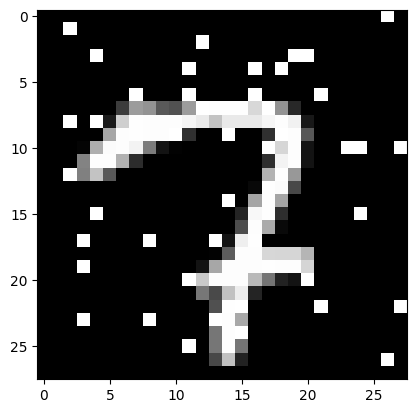

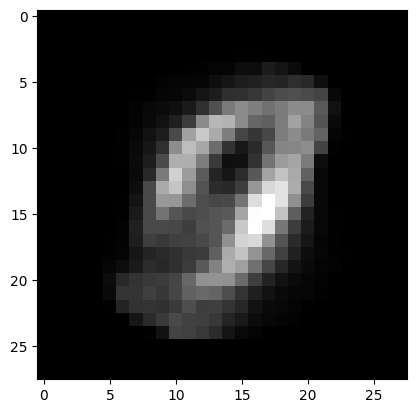

------------------------


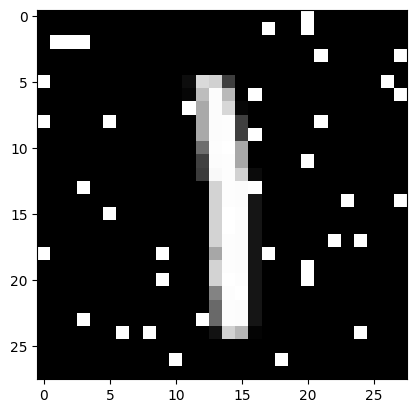

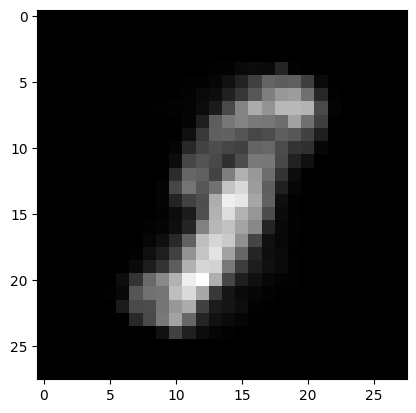

------------------------


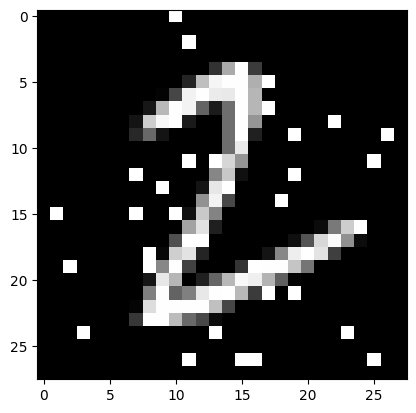

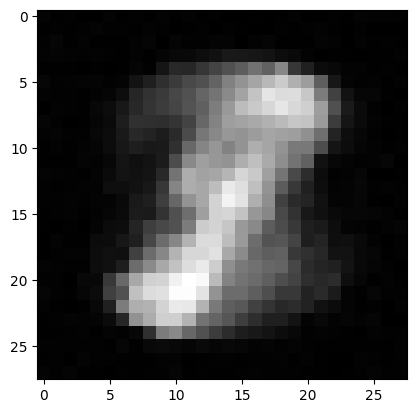

------------------------


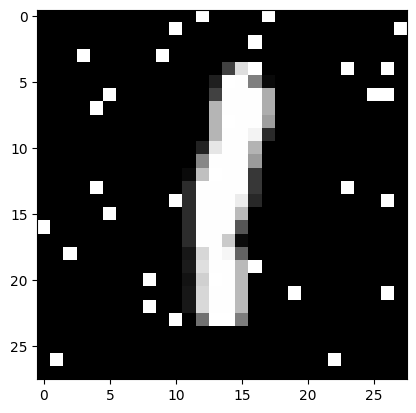

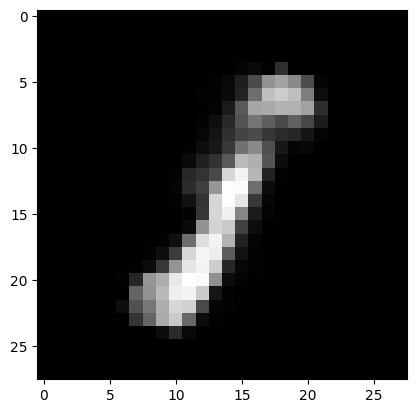

------------------------


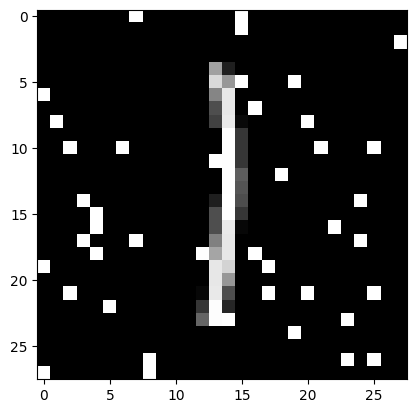

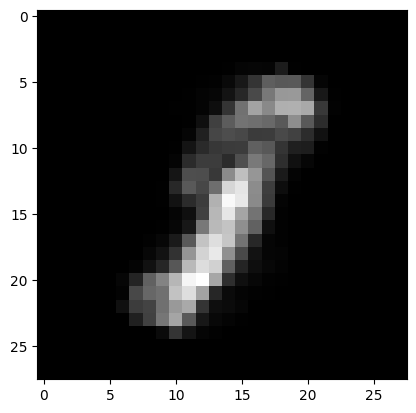

------------------------


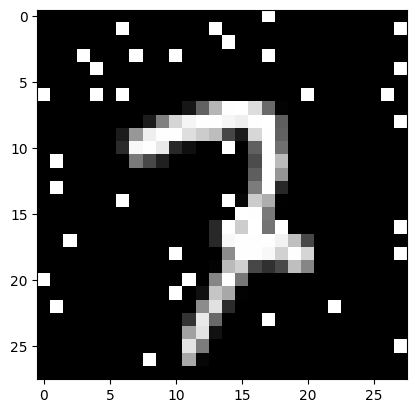

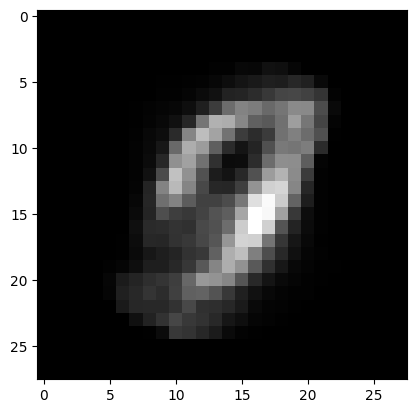

------------------------


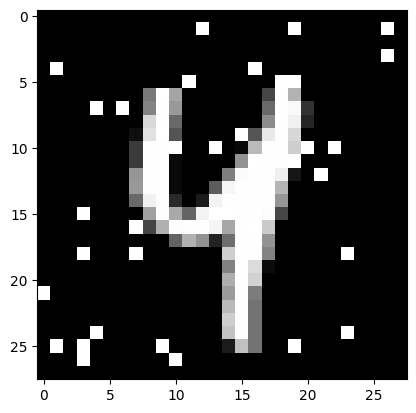

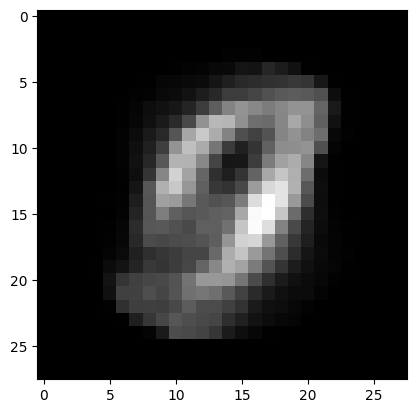

------------------------


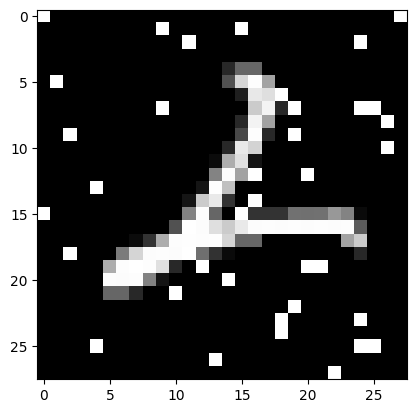

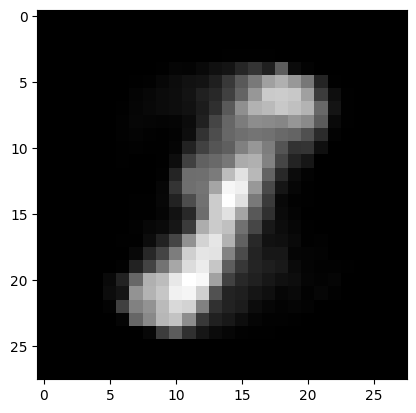

------------------------


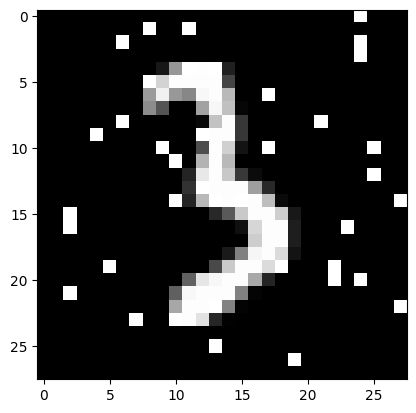

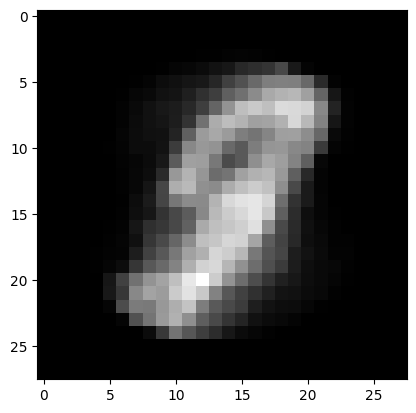

------------------------


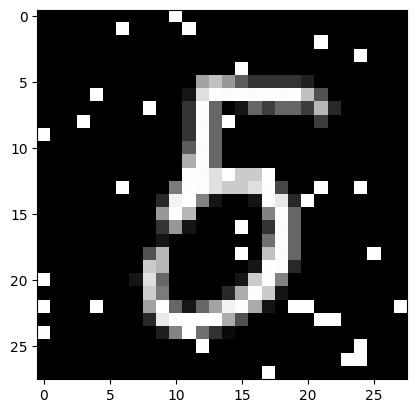

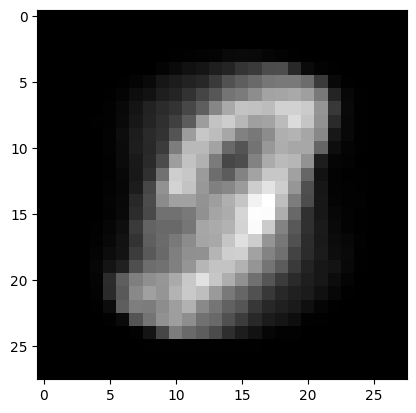

------------------------


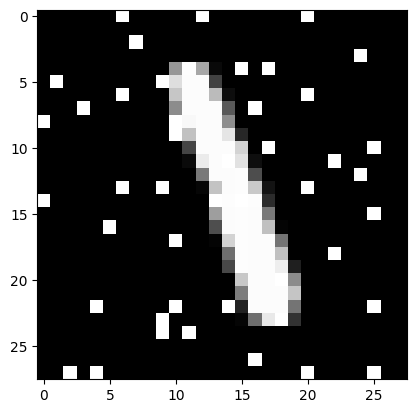

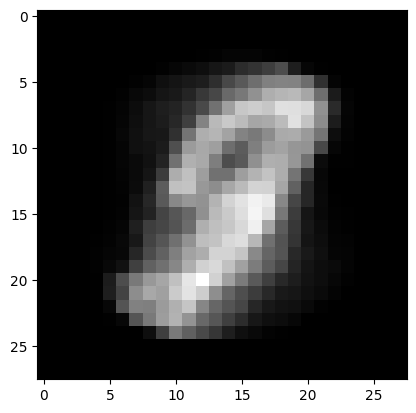

------------------------


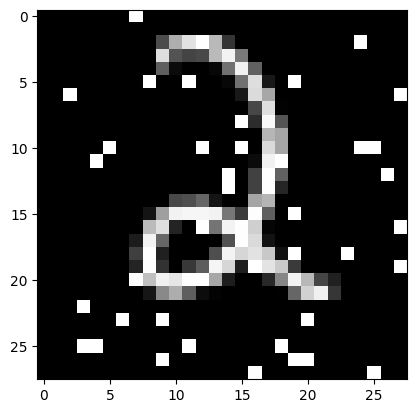

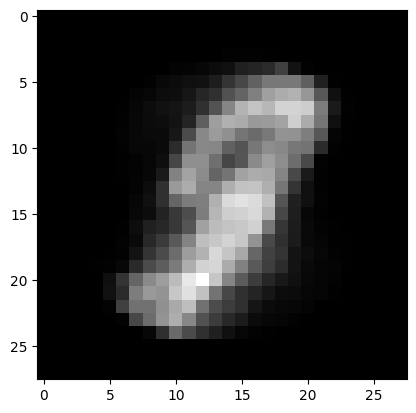

------------------------


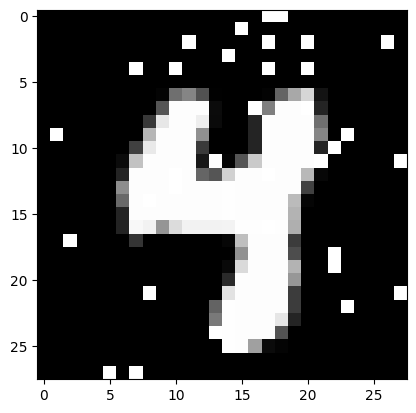

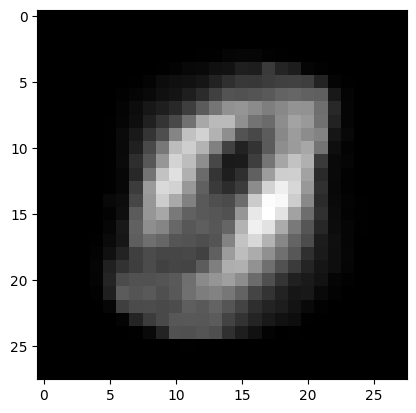

------------------------


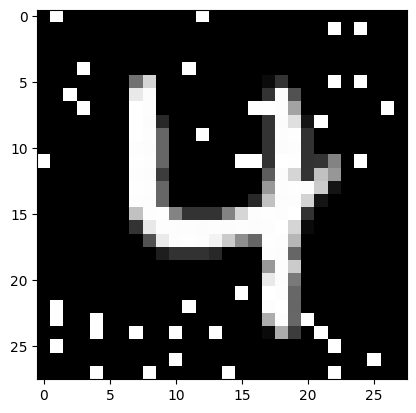

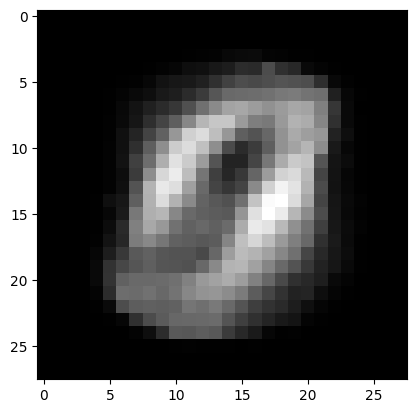

------------------------


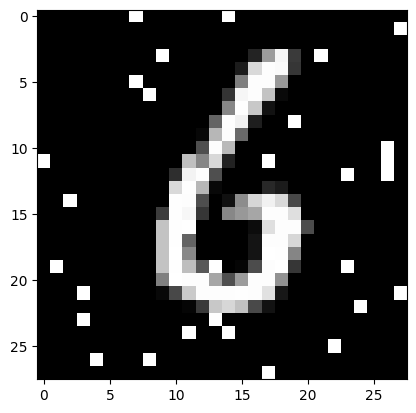

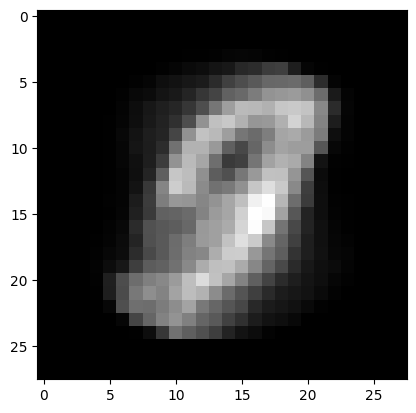

------------------------


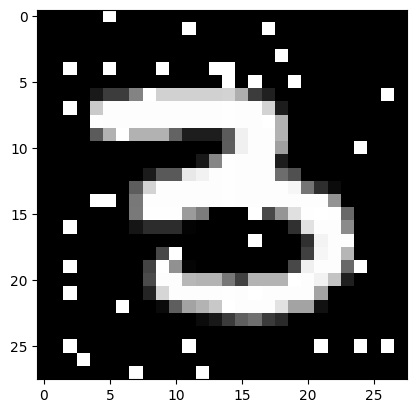

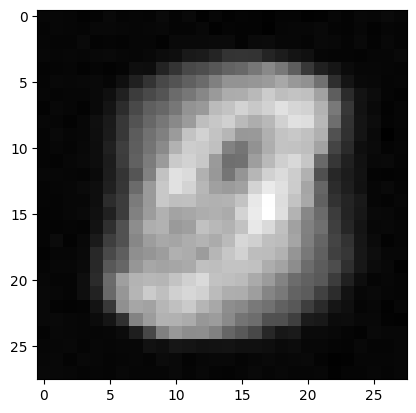

------------------------


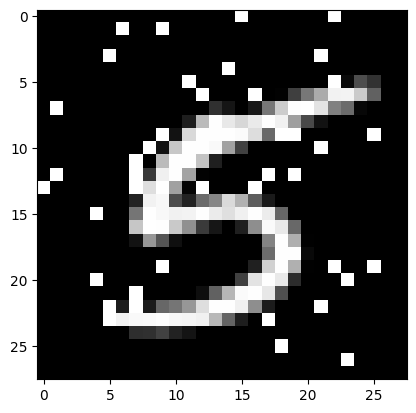

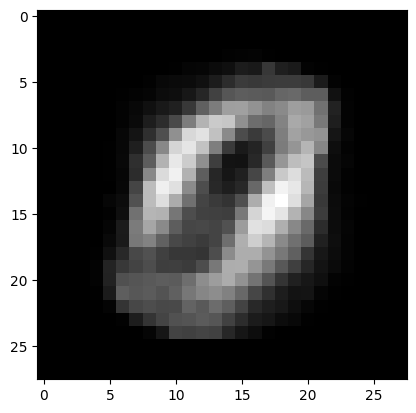

------------------------


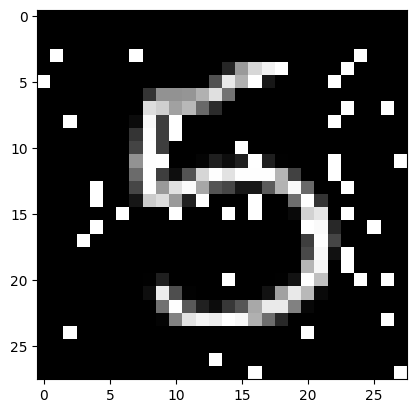

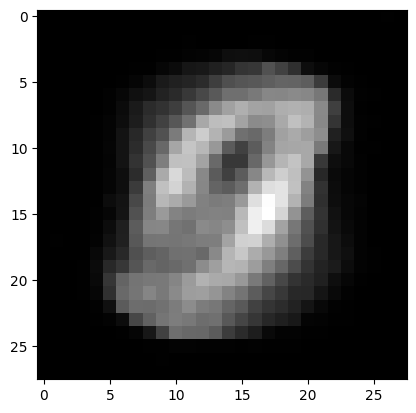

------------------------


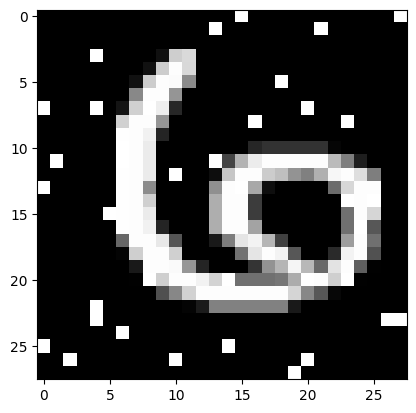

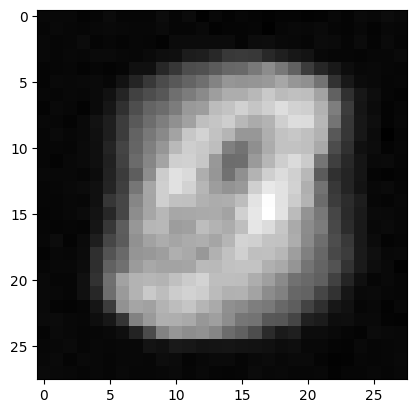

------------------------


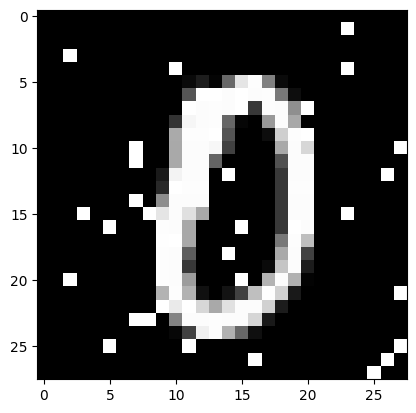

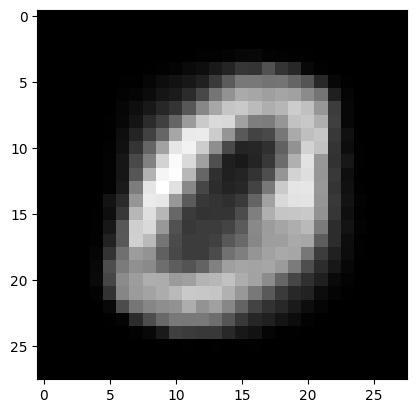

------------------------


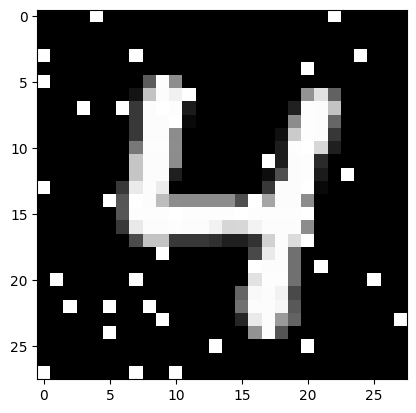

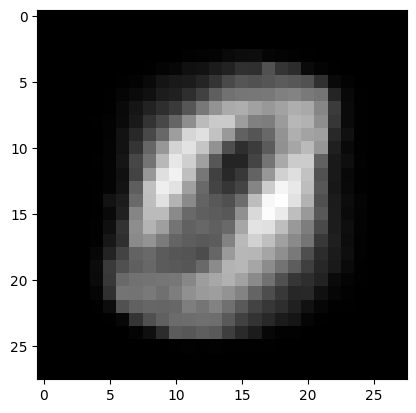

------------------------


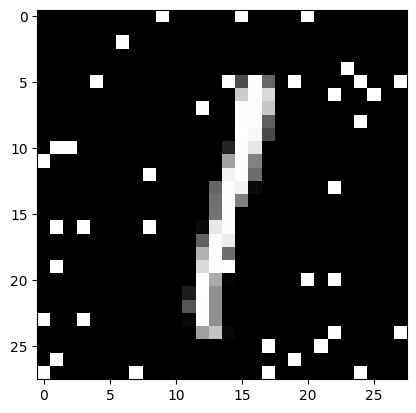

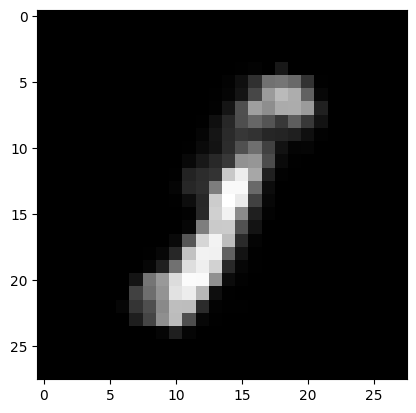

------------------------


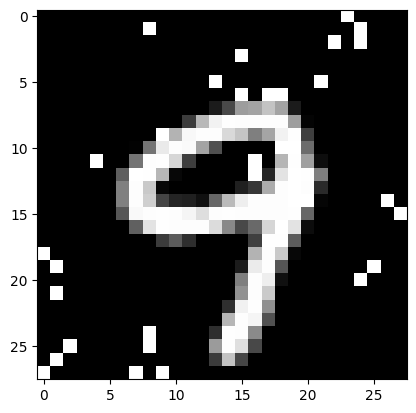

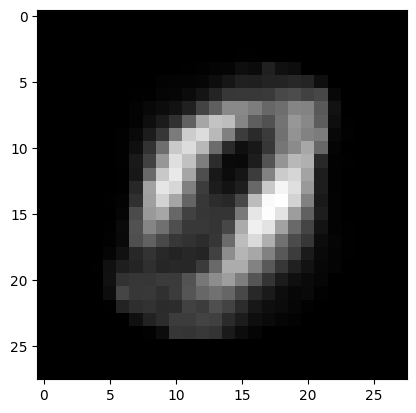

------------------------


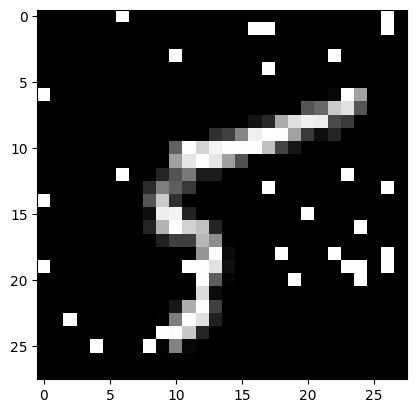

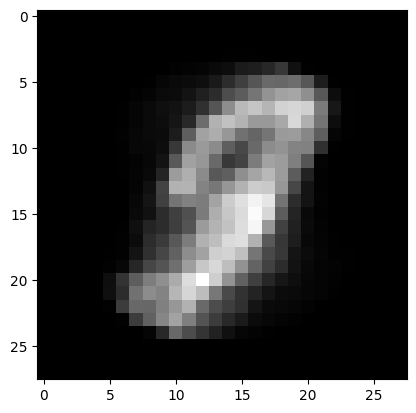

------------------------


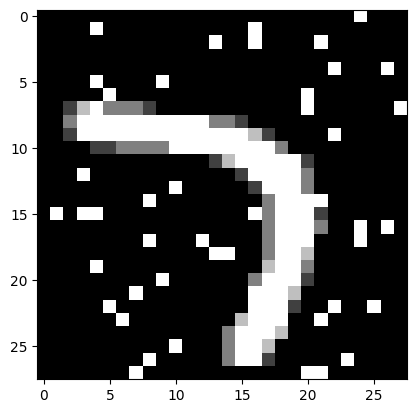

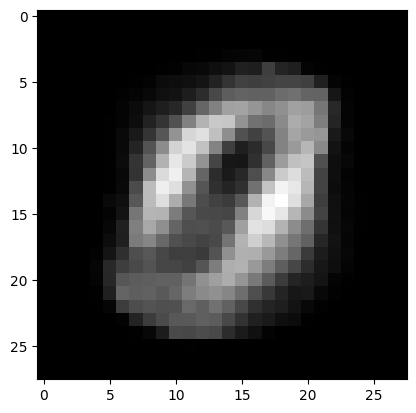

------------------------


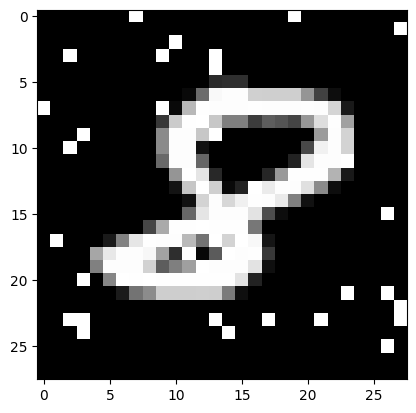

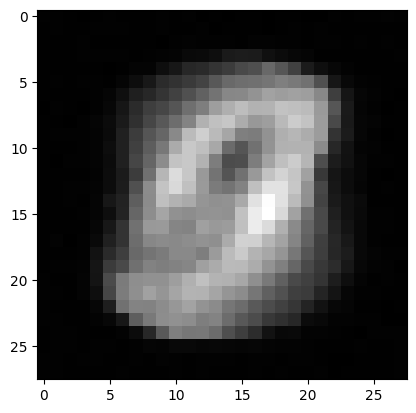

------------------------


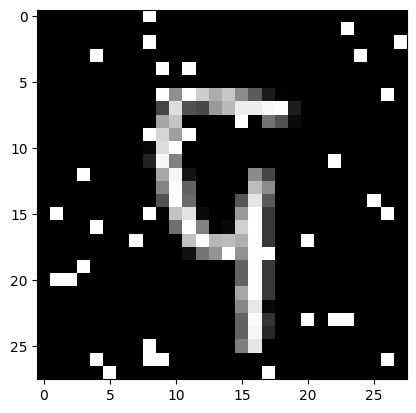

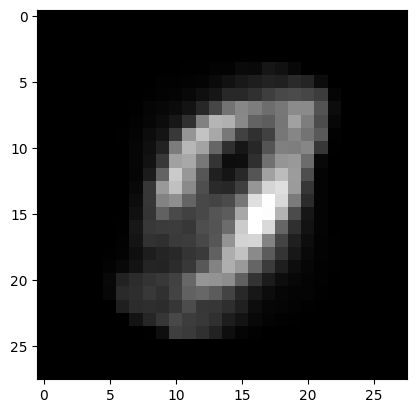

------------------------


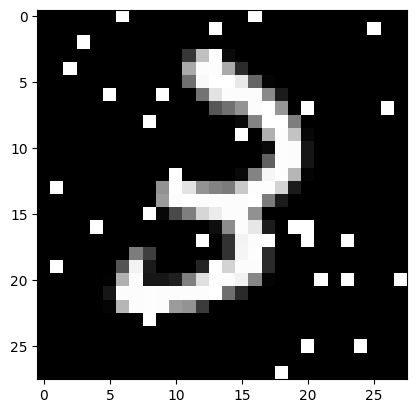

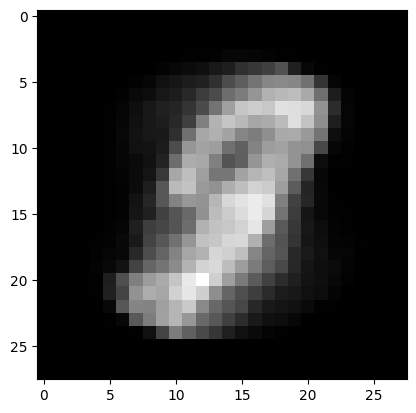

------------------------


In [ ]:
test_dataiter_noise = iter(testloader_noise) # объект итератора
images, _ = next(test_dataiter_noise) # получение значения
with torch.no_grad():
  for image in images:
    process_image_linear(image, al_loaded)
    print('------------------------')

In [ ]:
def train_conv(loader, loader_noise, loss, optimizer, model):
  epochs = 2
  print_every = 100
  iter = 0
  losses = []
  for epoch in range(epochs):
      for data, data_noise in zip(loader, loader_noise):

        # переносим изображения на устройство
        images = data[0].to(device)
        #print(images.size())
        images_noise = data_noise[0].to(device)

        optimizer.zero_grad() # сбросываем оптимизатор
        print(images_noise.shape)
        print(images_noise.size())
        output = model(images_noise) # получаем вывод модели
        loss_res = loss(output, images) # вычисляем функцию ошибки
        loss_res.backward() # вычисляем обратный градиент
        optimizer.step() # корректируем веса модели

        losses.append(loss_res)

        iter += 1
        if iter % print_every == 0:
          print(f'epoch {epoch+1} iteration {iter} avg loss {sum(losses)/len(losses)}')
          losses.clear()

      iter = 0
      # сохраняем модель в процессе обучения
      name = f'./ac_{epoch + 1}.pth'
      torch.save(model.state_dict(), name)

In [ ]:
train_conv(trainloader, trainloader_noise, bce, optimizer_ac, ac)

torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 2

Загрузим обученнные веса сверточного автокодировщика

In [ ]:
ac_loaded = AutoencoderConv()
ac_loaded.load_state_dict(torch.load('ac_2.pth'))
ac_loaded = ac_loaded.to(device)

In [ ]:
def process_image_conv(image, model):
  show_single_images(image)
  image = image.to(device)
  #print(image.get_device())
  output = model(image)
  #print(output.size())
  #output_image = output.reshape(-1, 28, 28)
  show_single_images(output)

Проверим обученнный сверточный автокодировщик

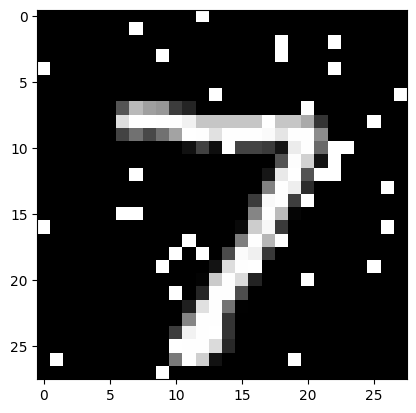

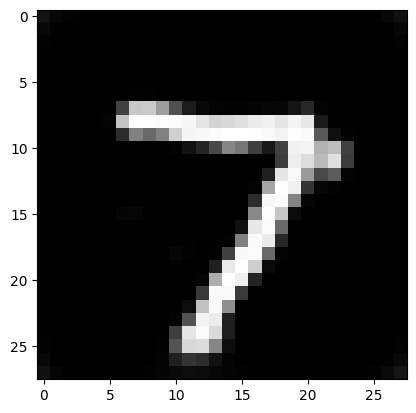

------------------------


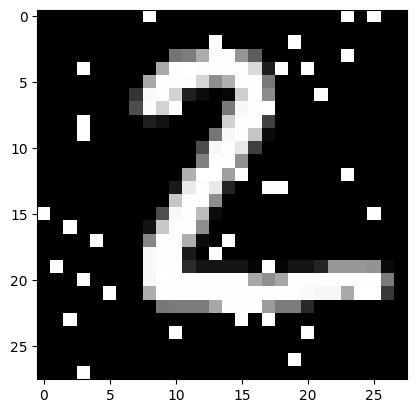

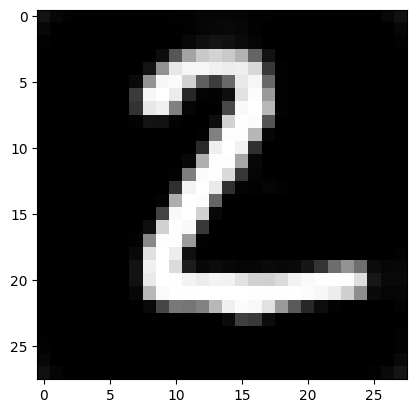

------------------------


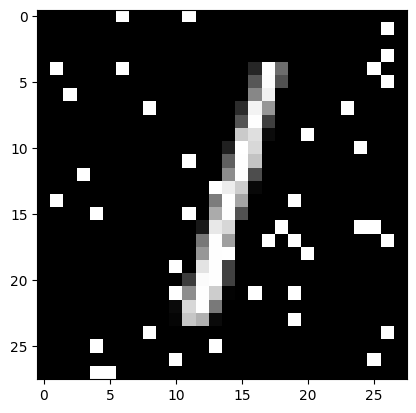

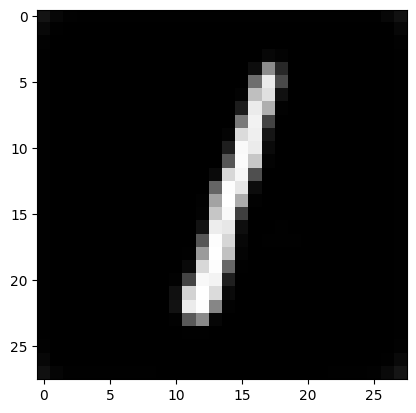

------------------------


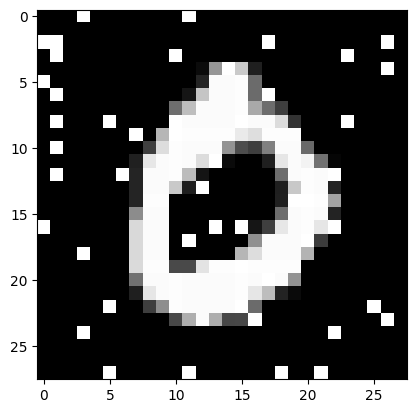

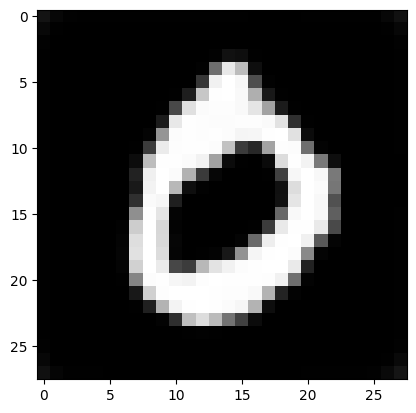

------------------------


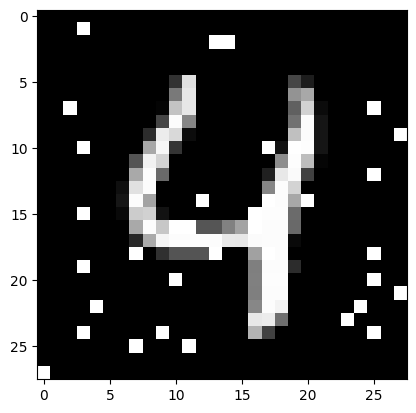

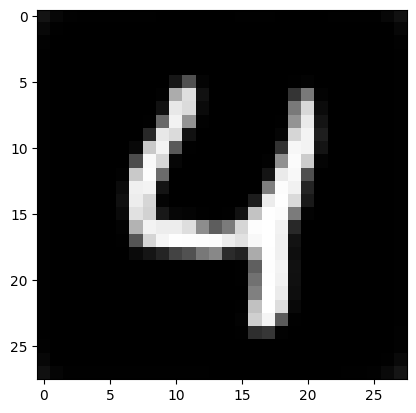

------------------------


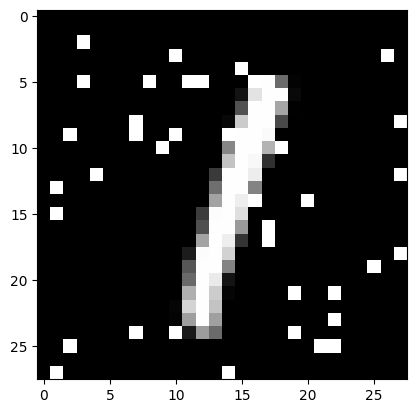

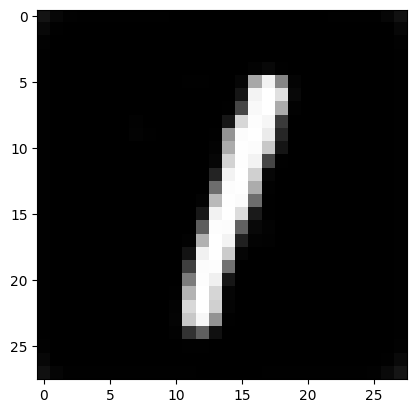

------------------------


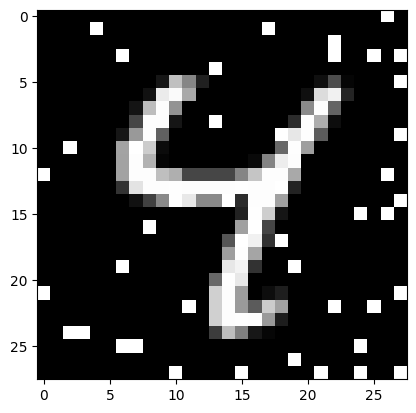

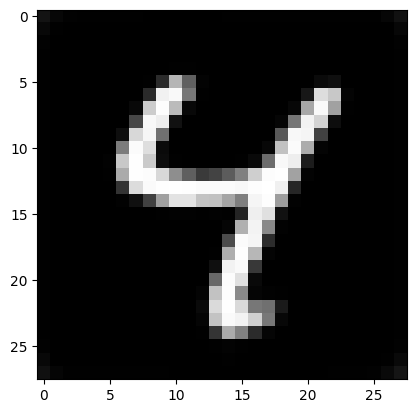

------------------------


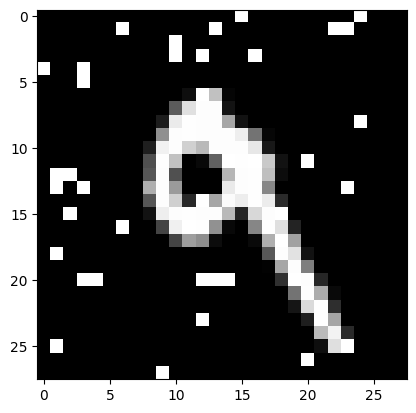

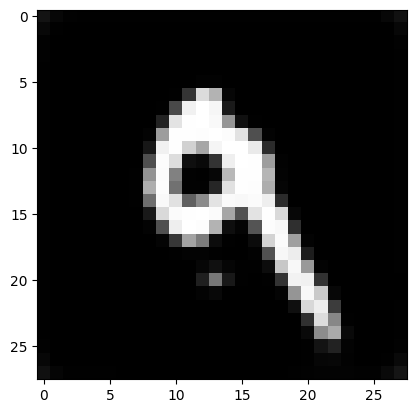

------------------------


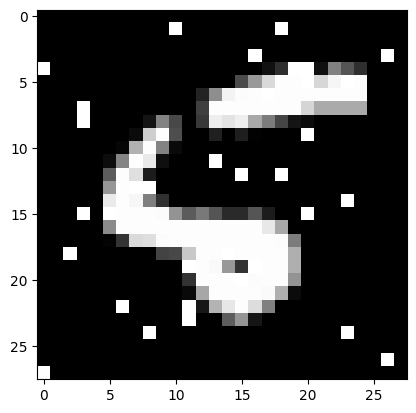

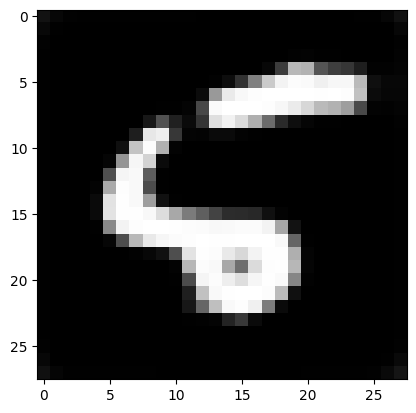

------------------------


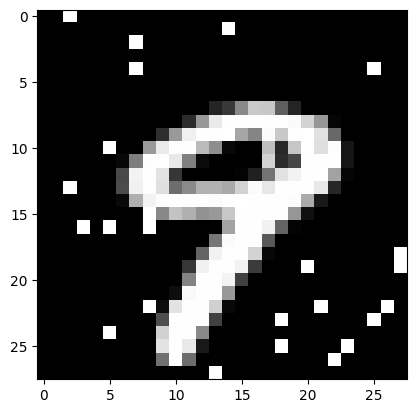

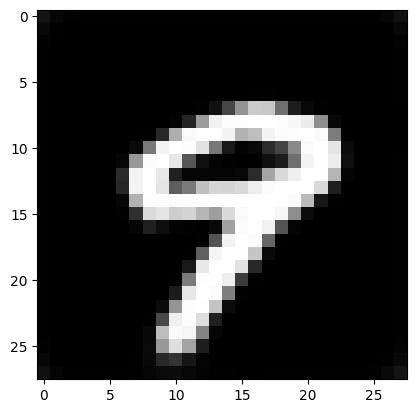

------------------------


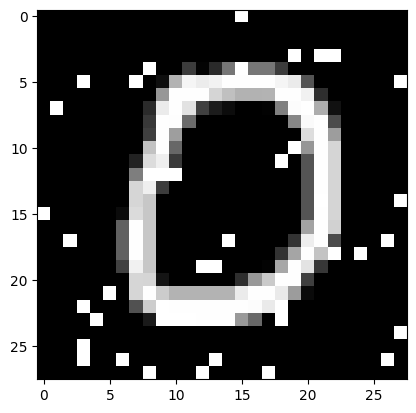

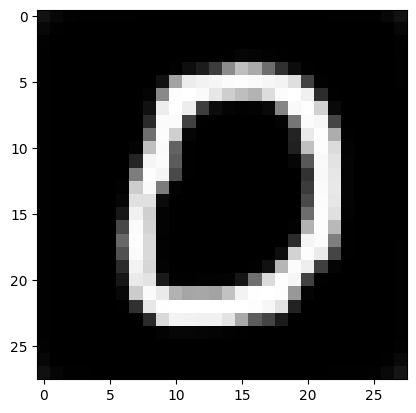

------------------------


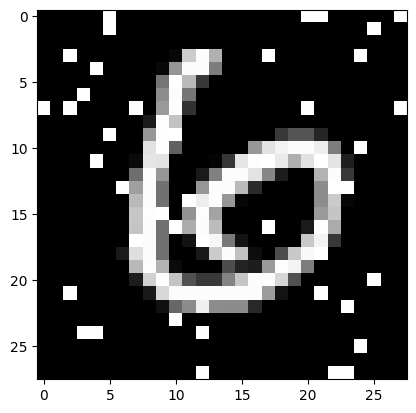

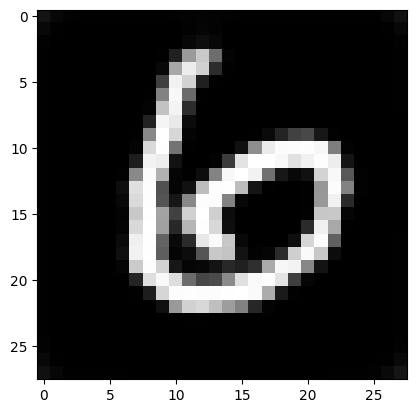

------------------------


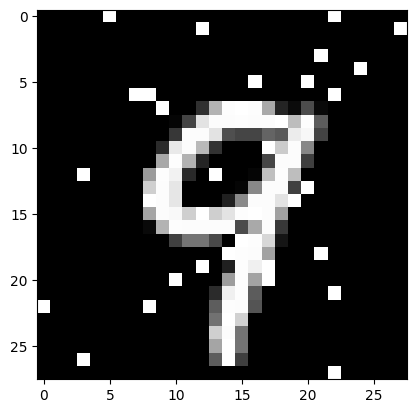

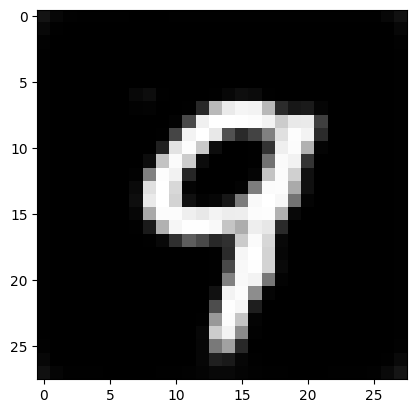

------------------------


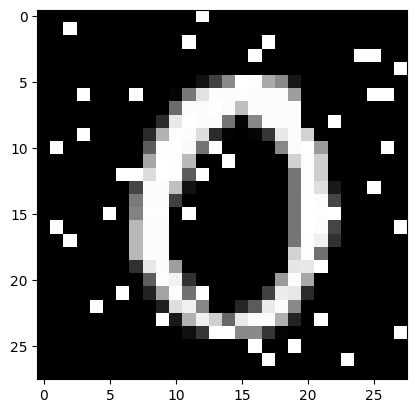

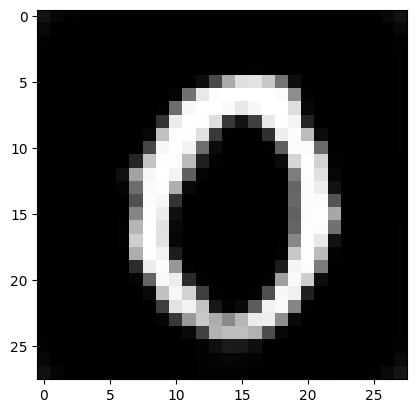

------------------------


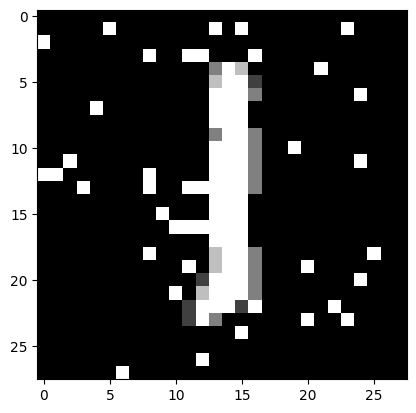

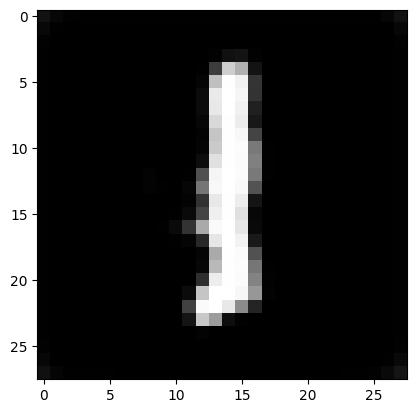

------------------------


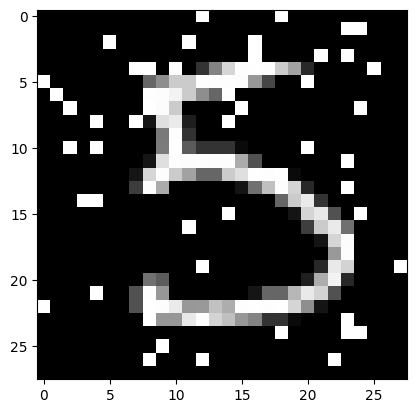

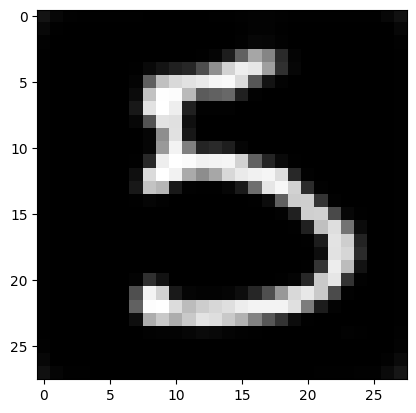

------------------------


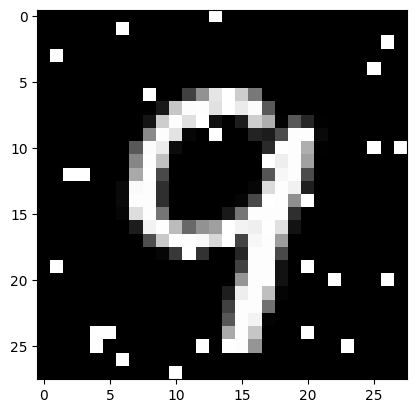

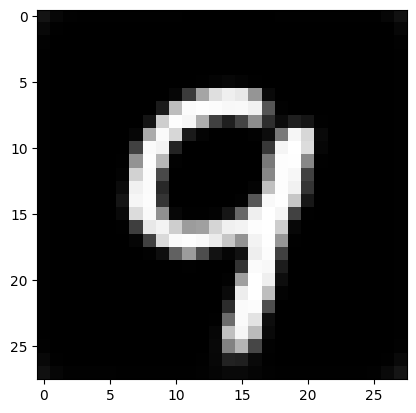

------------------------


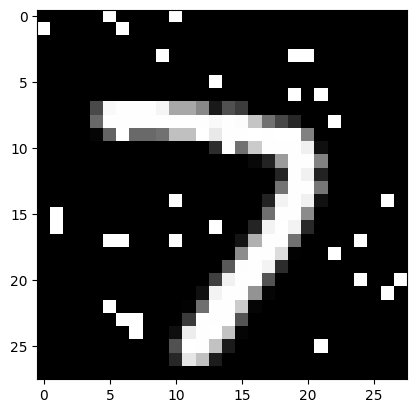

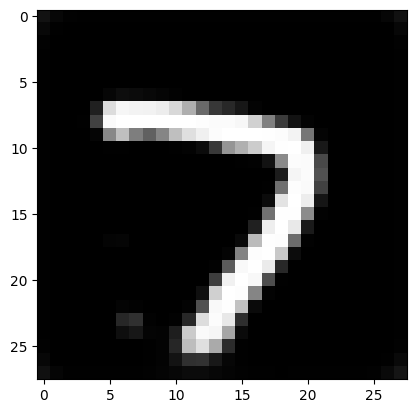

------------------------


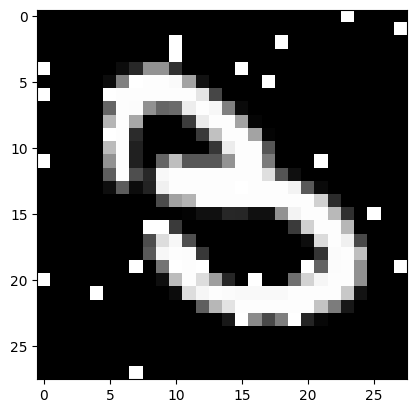

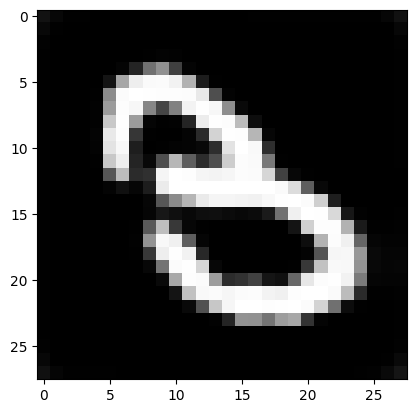

------------------------


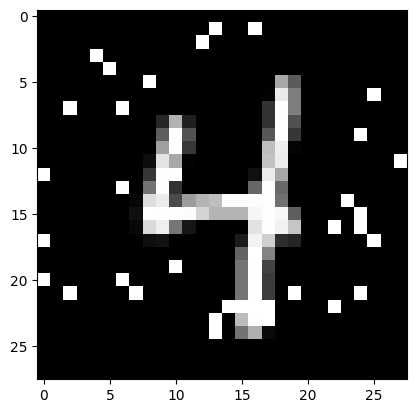

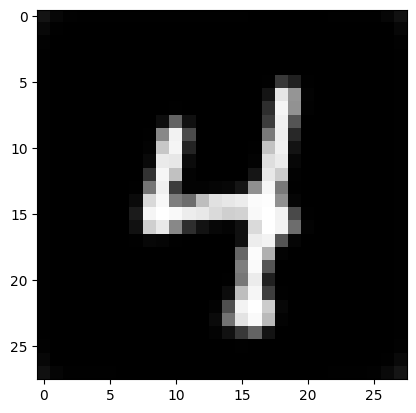

------------------------


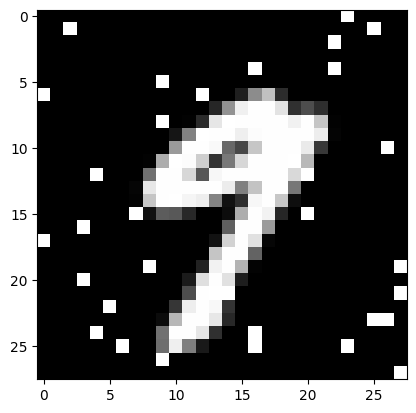

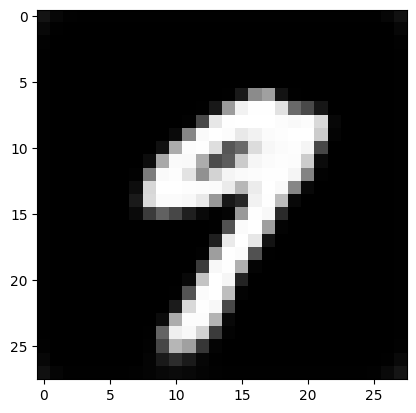

------------------------


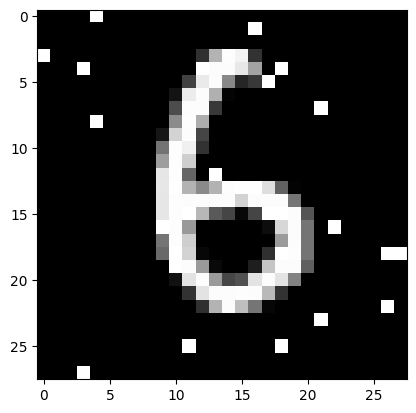

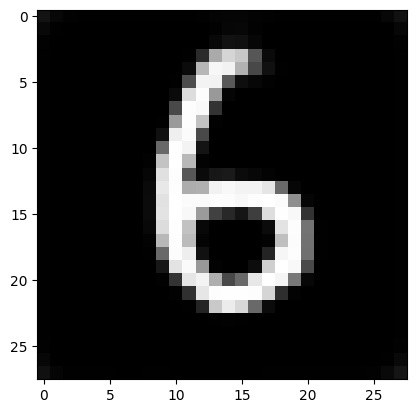

------------------------


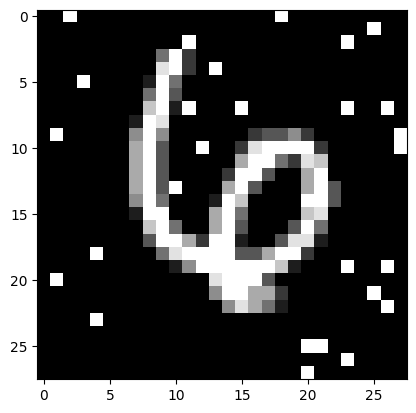

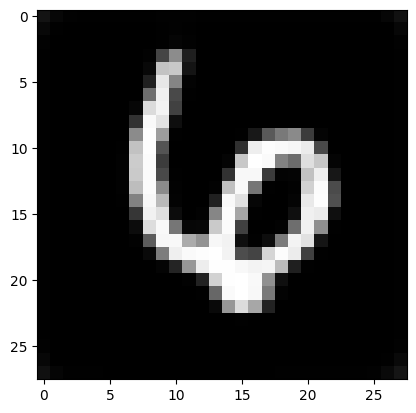

------------------------


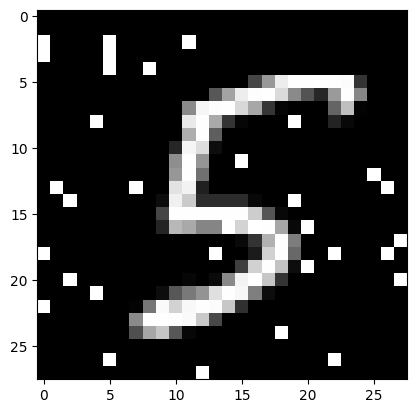

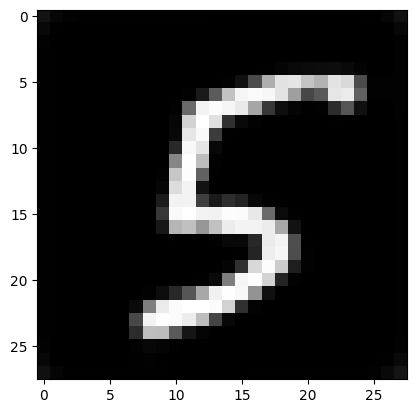

------------------------


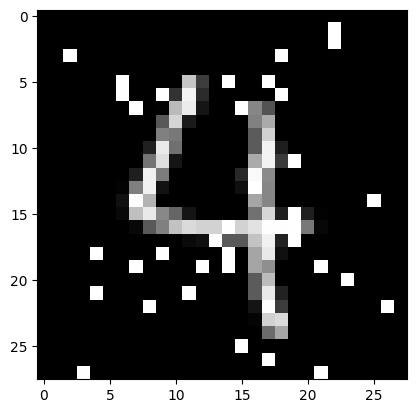

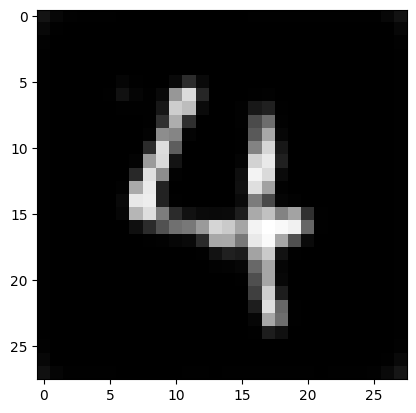

------------------------


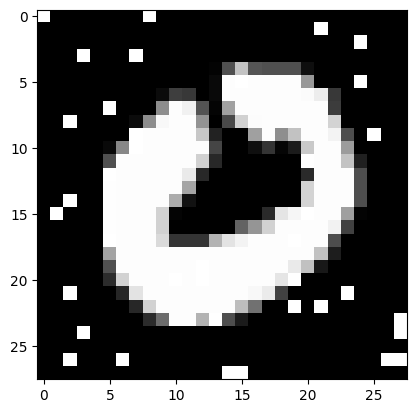

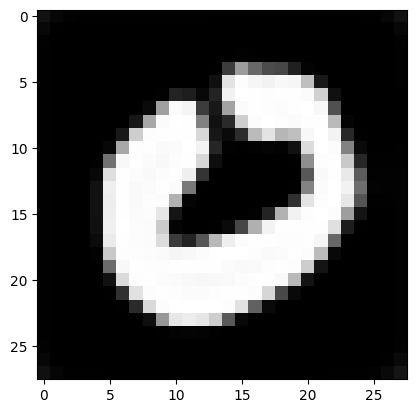

------------------------


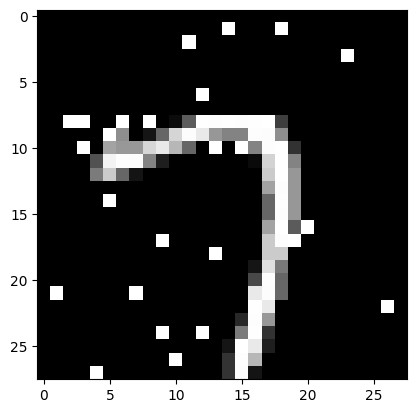

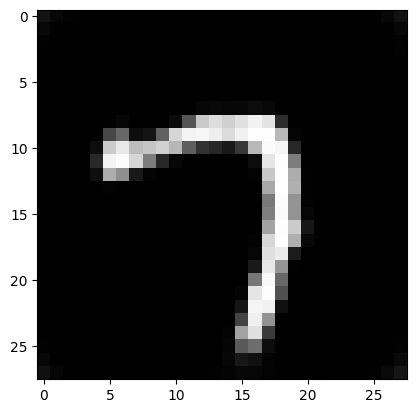

------------------------


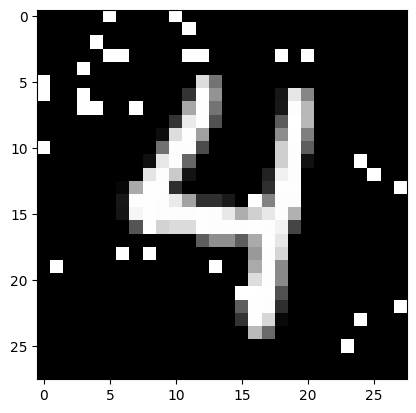

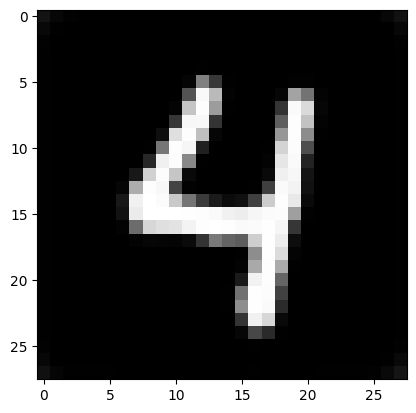

------------------------


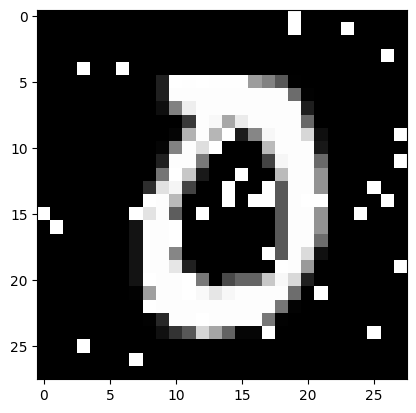

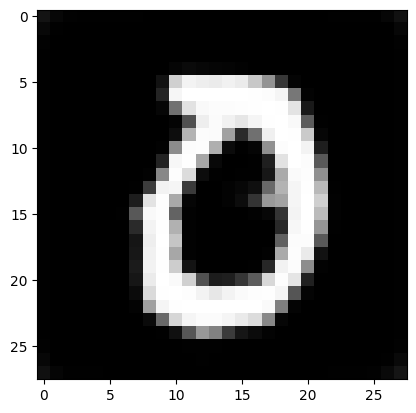

------------------------


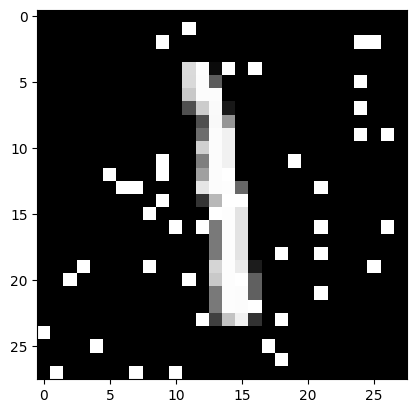

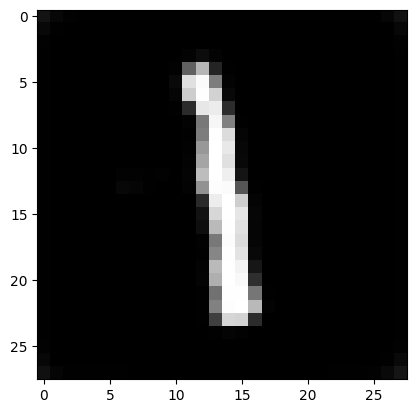

------------------------


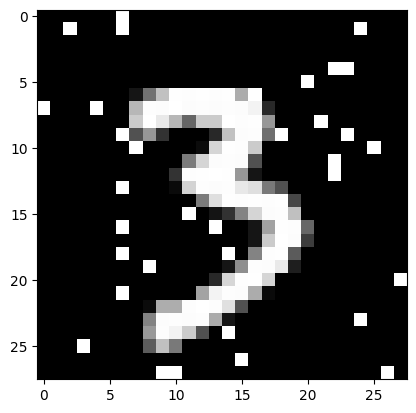

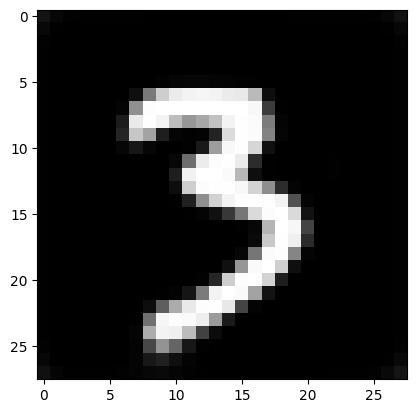

------------------------


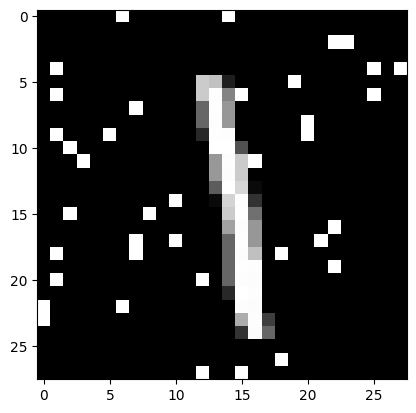

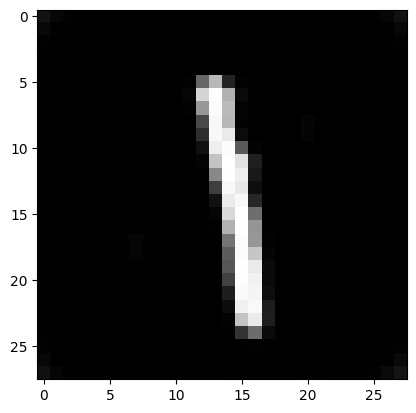

------------------------


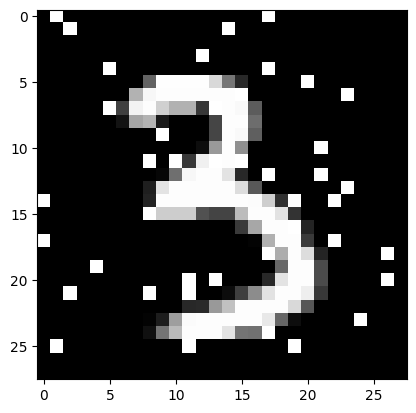

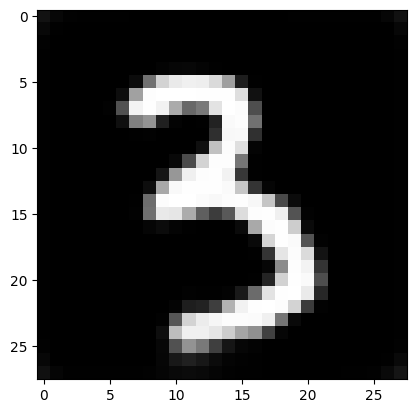

------------------------


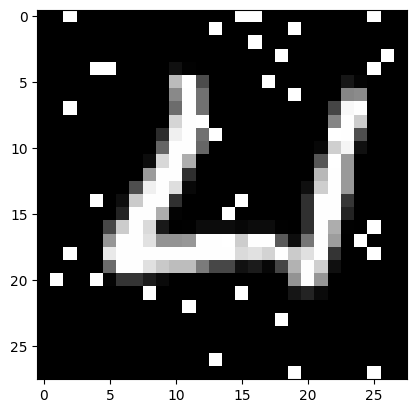

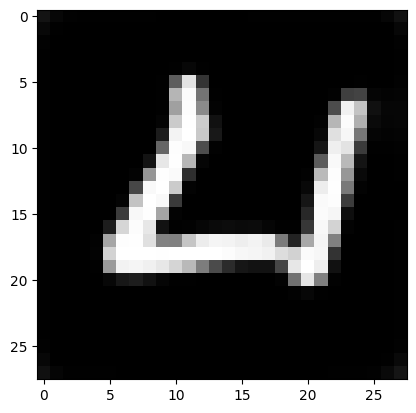

------------------------


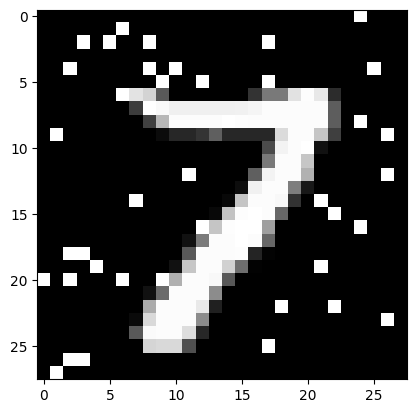

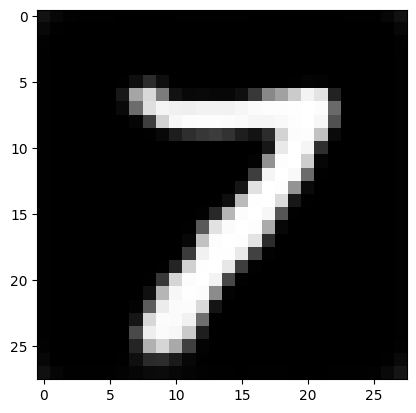

------------------------


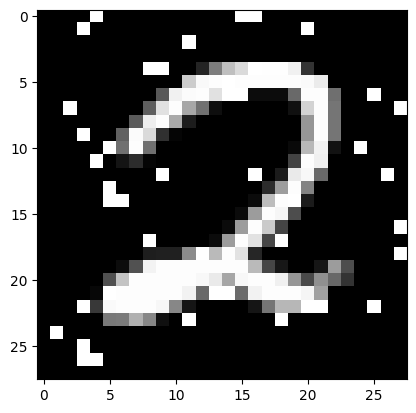

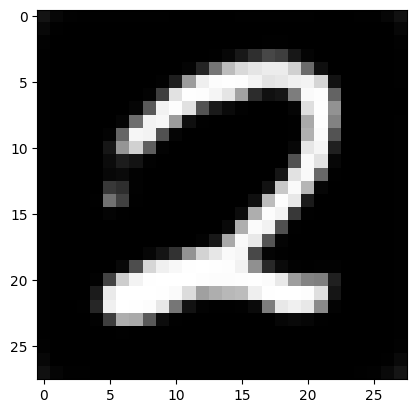

------------------------


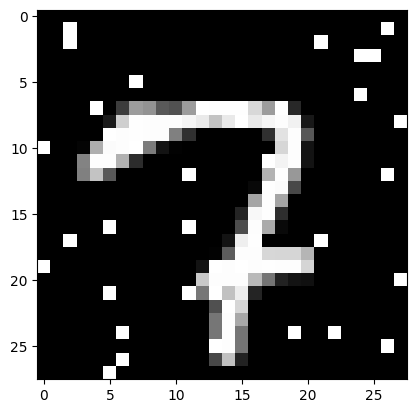

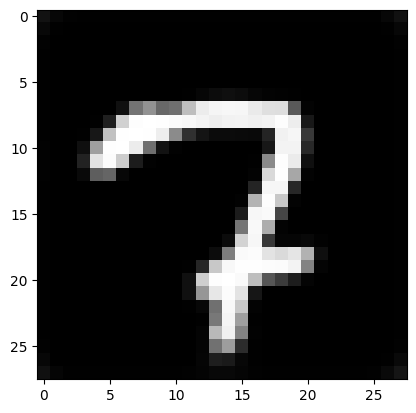

------------------------


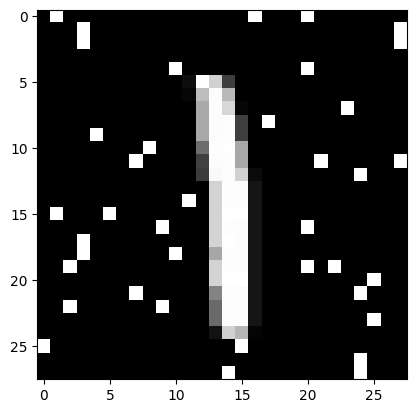

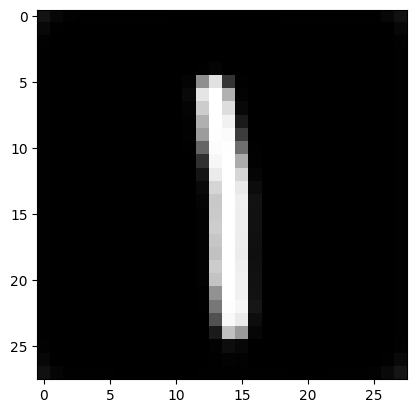

------------------------


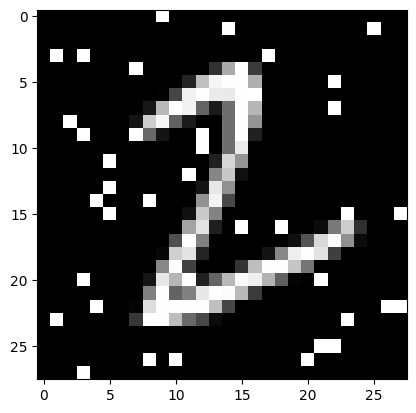

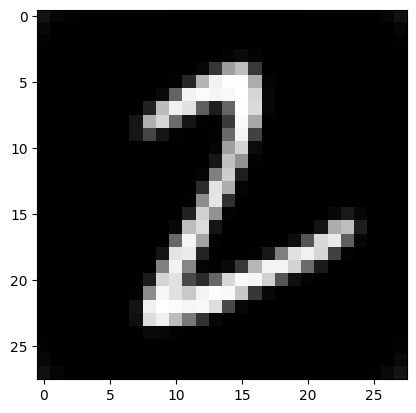

------------------------


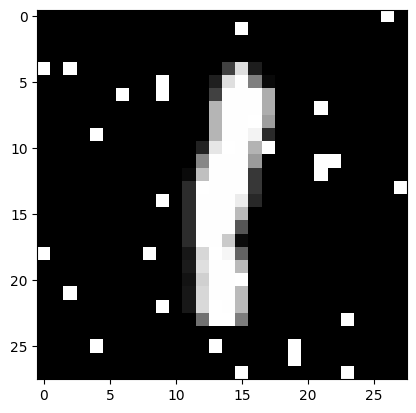

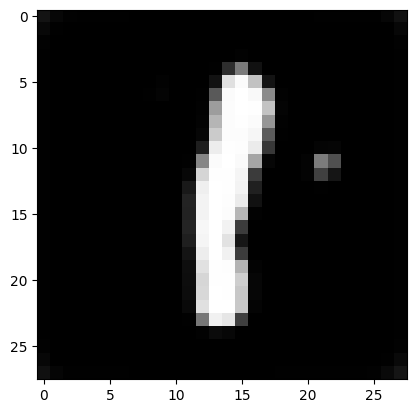

------------------------


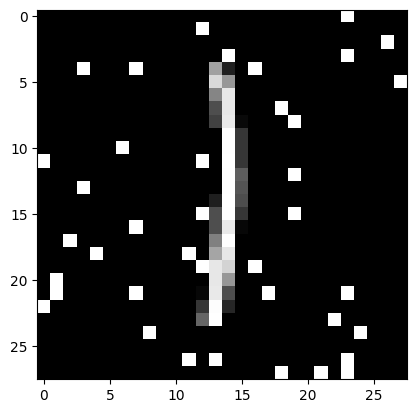

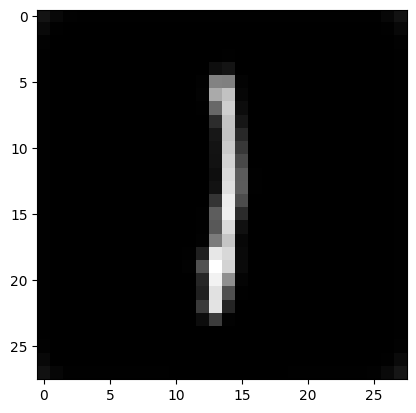

------------------------


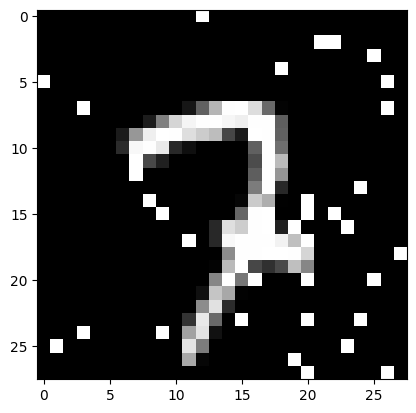

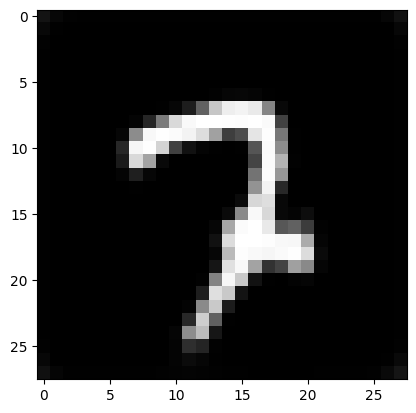

------------------------


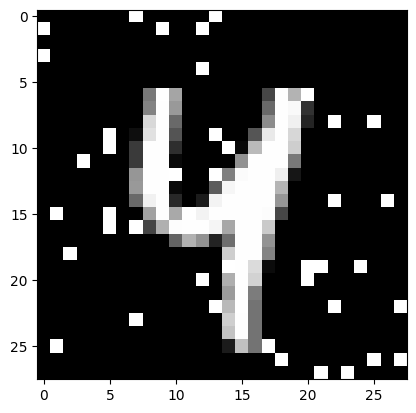

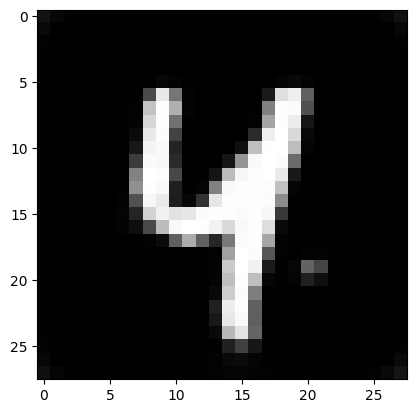

------------------------


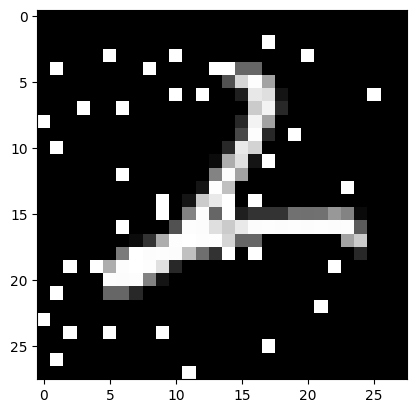

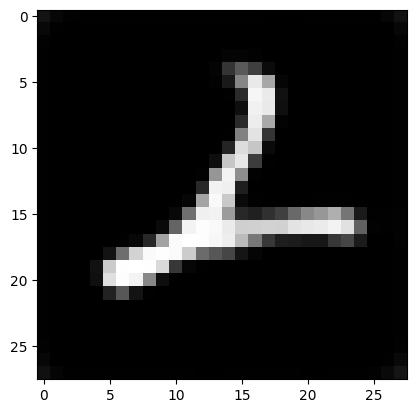

------------------------


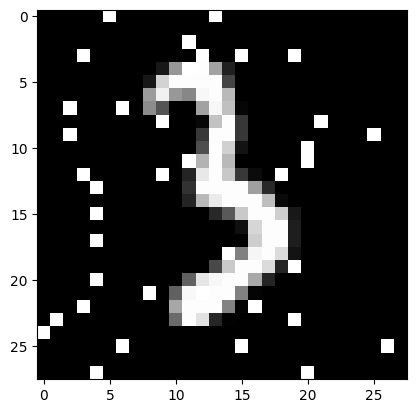

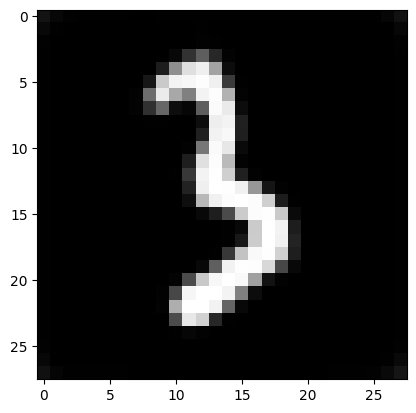

------------------------


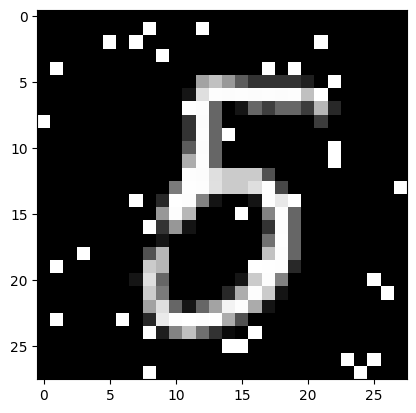

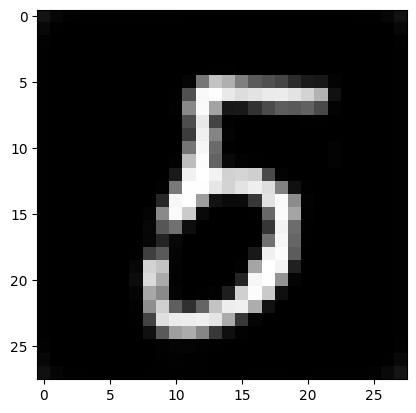

------------------------


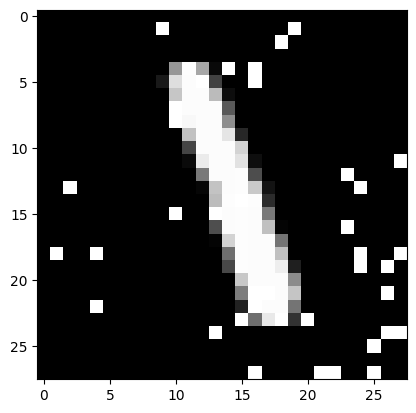

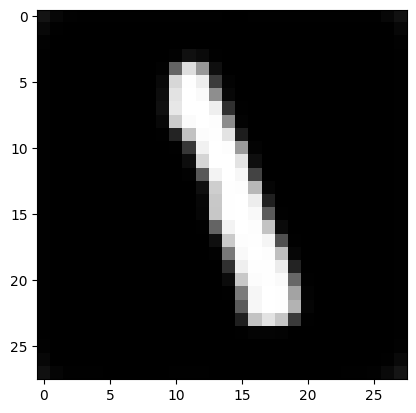

------------------------


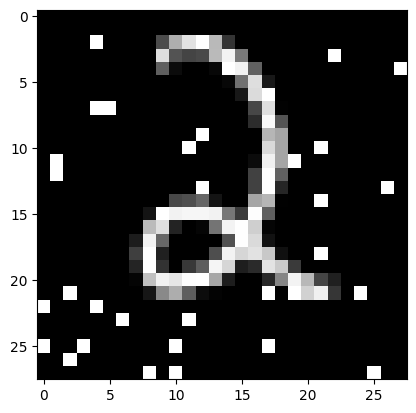

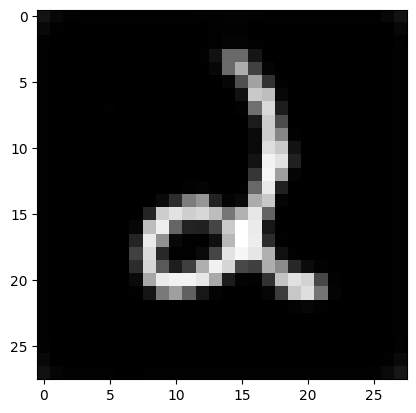

------------------------


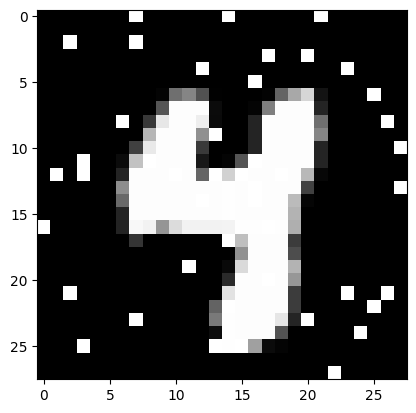

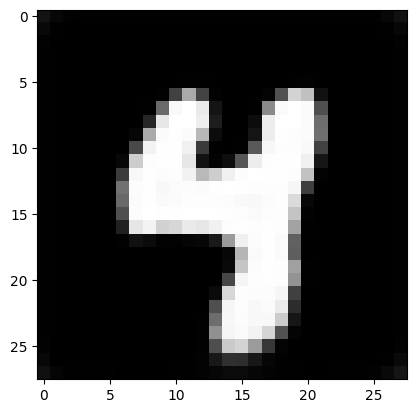

------------------------


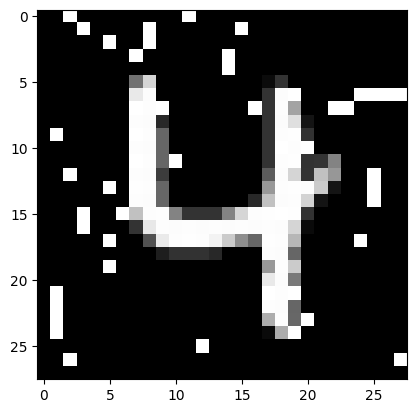

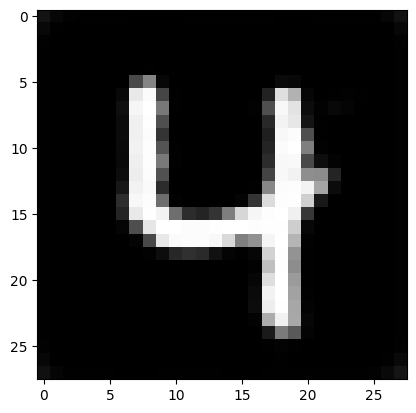

------------------------


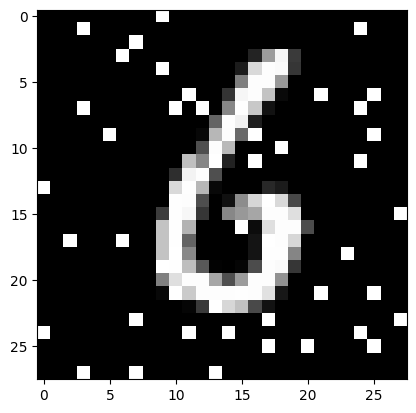

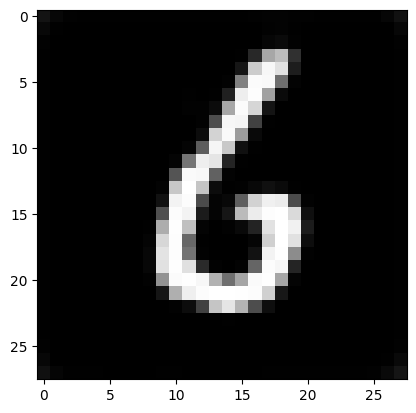

------------------------


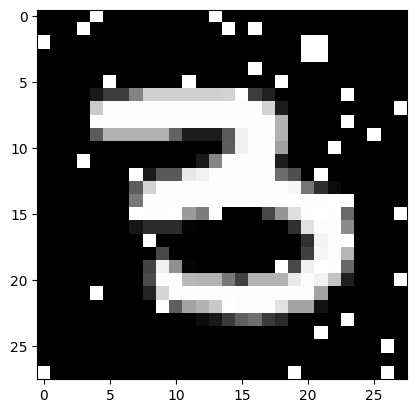

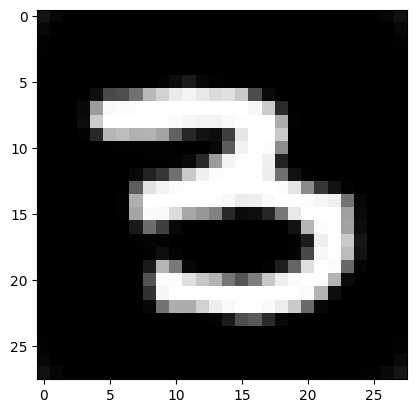

------------------------


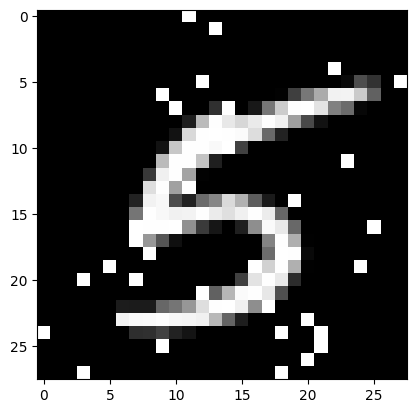

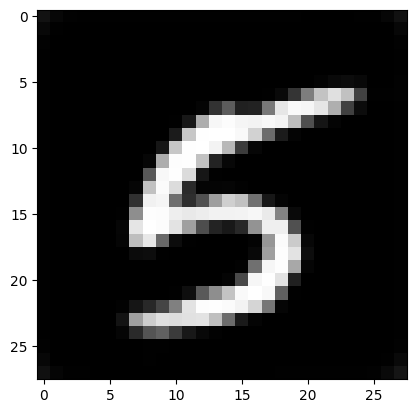

------------------------


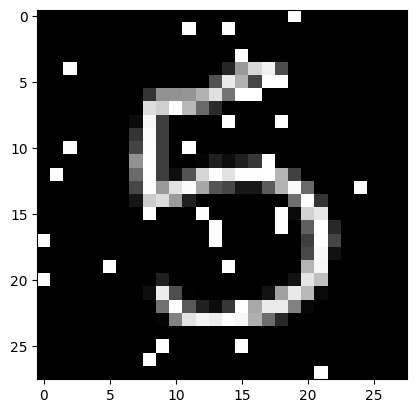

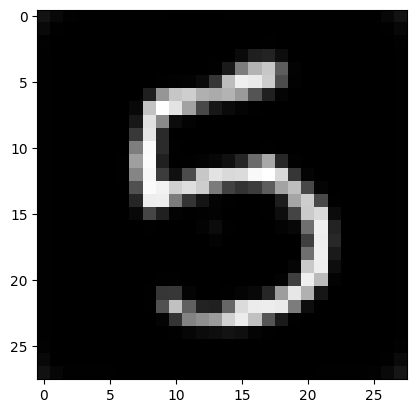

------------------------


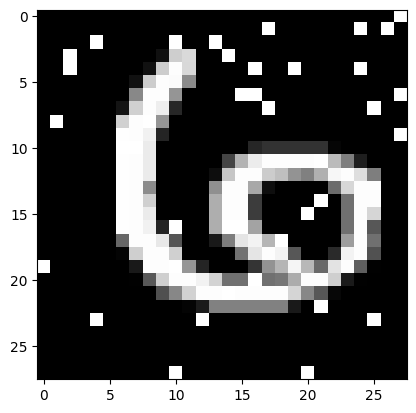

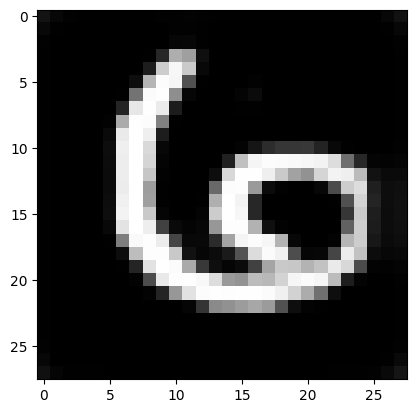

------------------------


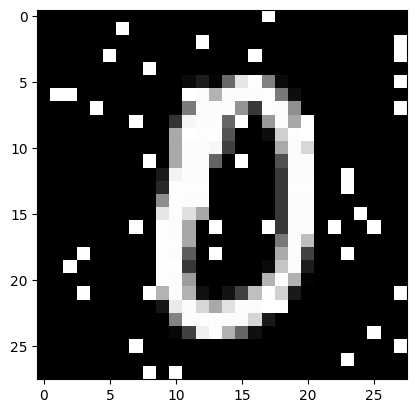

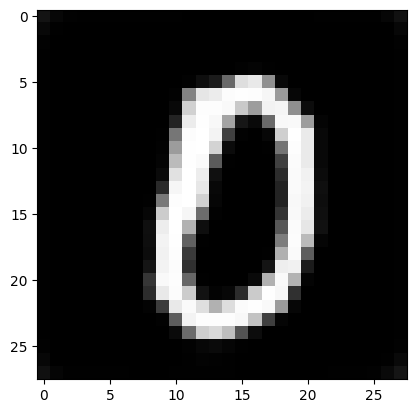

------------------------


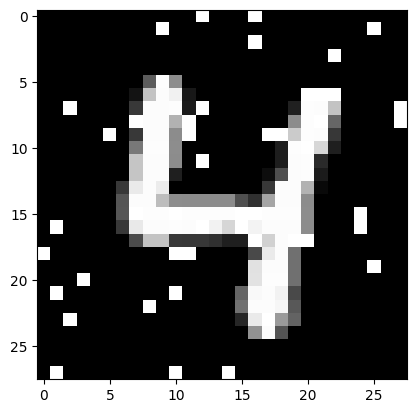

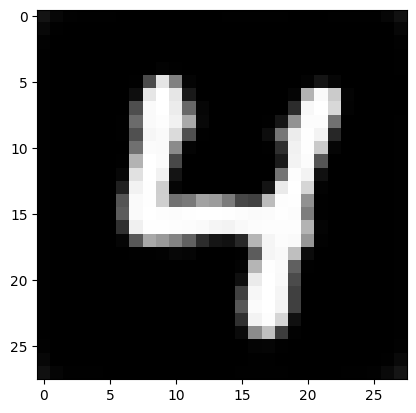

------------------------


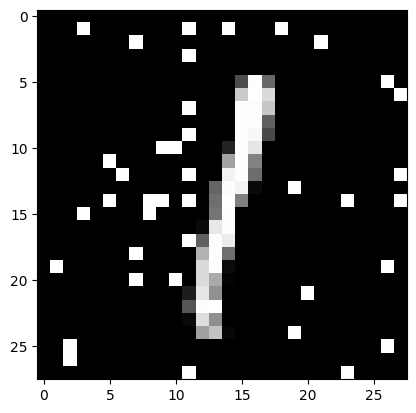

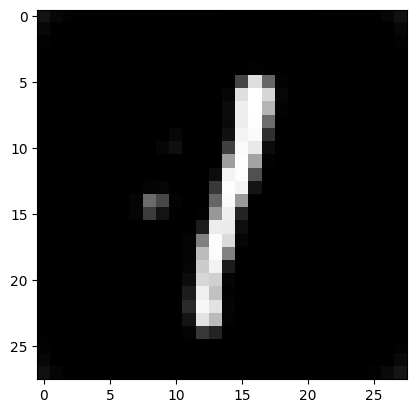

------------------------


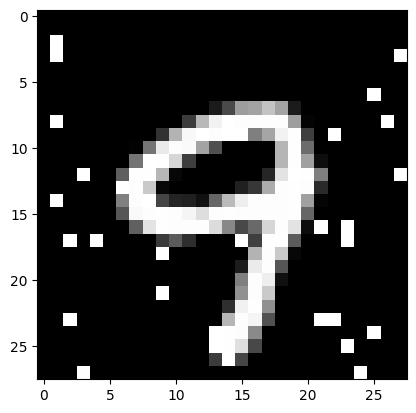

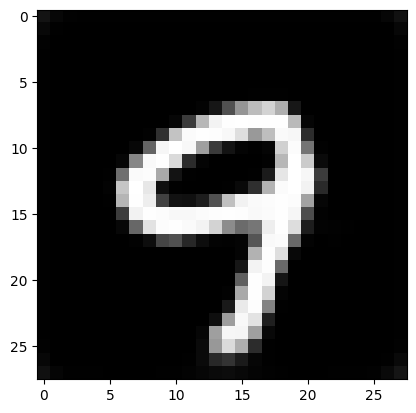

------------------------


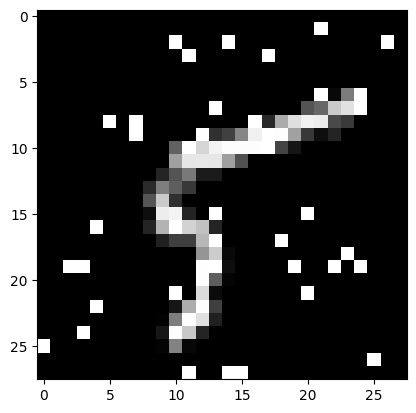

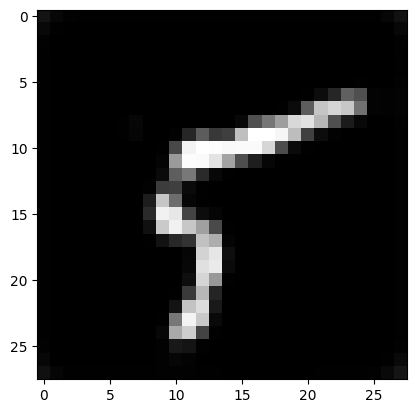

------------------------


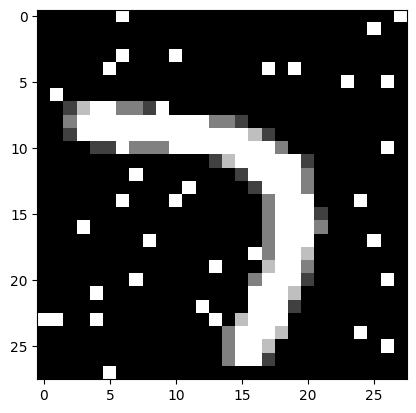

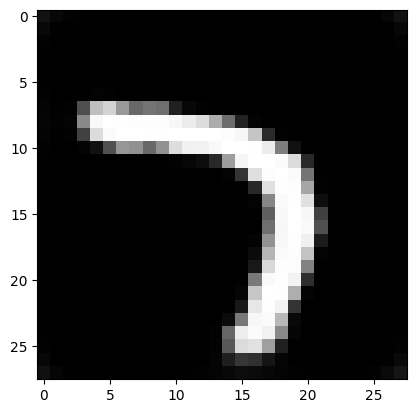

------------------------


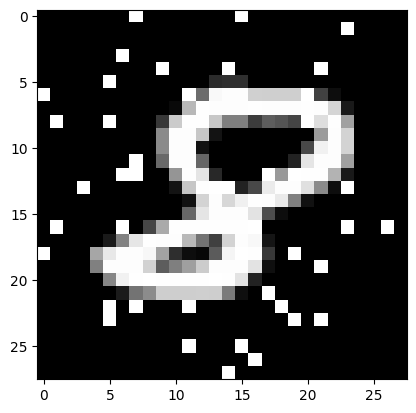

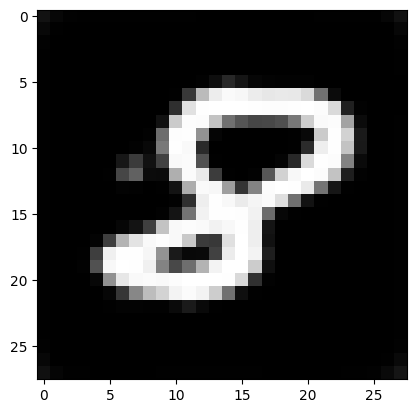

------------------------


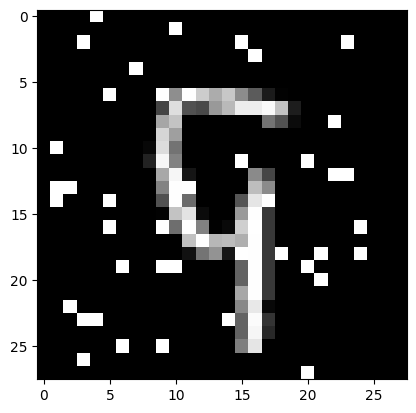

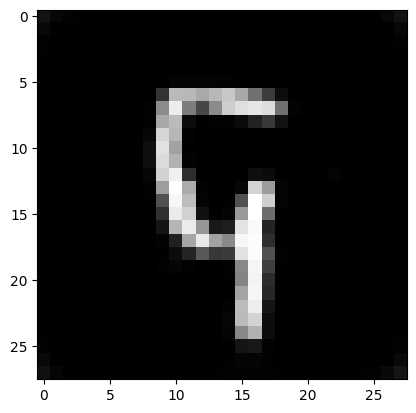

------------------------


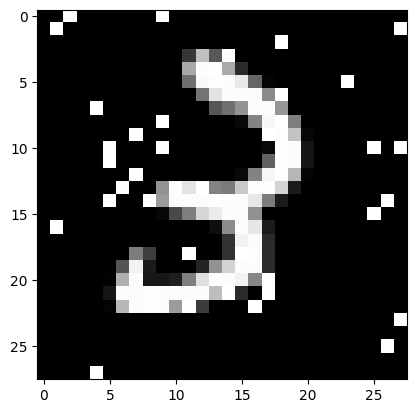

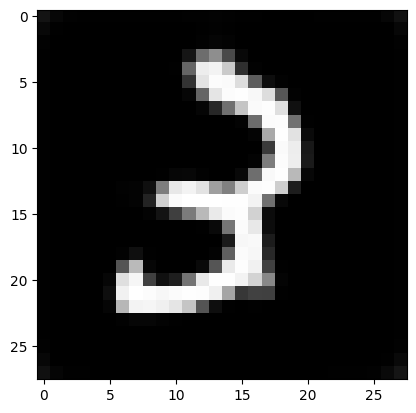

------------------------


In [ ]:
test_dataiter_noise = iter(testloader_noise) # объект итератора
images, _ = next(test_dataiter_noise) # получение значения
with torch.no_grad():
  for image in images:
    process_image_conv(image, ac_loaded)
    print('------------------------')